In [1]:
library('ggplot2')
library(repr)
options(repr.plot.width=16, repr.plot.height=8)

# Exercise 1

### 1) Study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.
### Assume the following priors:
### - a uniform distribution
### - a Jeffrey’s prior
### - a step function:

$$
g(\pi)=
\left\{
\begin{array}{ll}
      \pi &  \pi \le 0.2 \\
      0.2 &  0.2 < \pi \le 0.3 \\
      0.5 - \pi &  0.3 < \pi \le 0.5 \\
      0 & 0.5 < \pi
\end{array} 
\right.
$$

In [2]:
y <- 7
n <- 20

n_samples <- 1000
delta_p <- 1/n_samples
p <- seq(from = 1/(2*n_samples), by = 1/n_samples, length.out = n_samples)
likelihood <- dbinom(x = y, size = n, prob = p)

In [3]:
g <- function(x) {
    g_x <- rep(0,length(x))
    for (i in 1:length(x)) {
        if (x[i] <= 0.2) {
            g_x[i] <- x[i]
        } else if (0.2 < x[i] && x[i] <= 0.3) {
            g_x[i] <- 0.2
        } else if (0.3 < x[i] && x[i] <= 0.5) {
            g_x[i] <- 0.5 - x[i]
        } else if (0.5 < x[i]) {
            g_x[i] <- 0
        } 
    }
    
    return(g_x)
}

In [4]:
prior_uni <- dunif(p,0,1)
prior_jeffreys <- dbeta(p, 0.5, 0.5)/(sum(delta_p*dbeta(p, 0.5, 0.5)))
prior_step <- g(p)/(sum(g(p)*delta_p))

df <- data.frame(p, prior_uni, prior_jeffreys, prior_step)

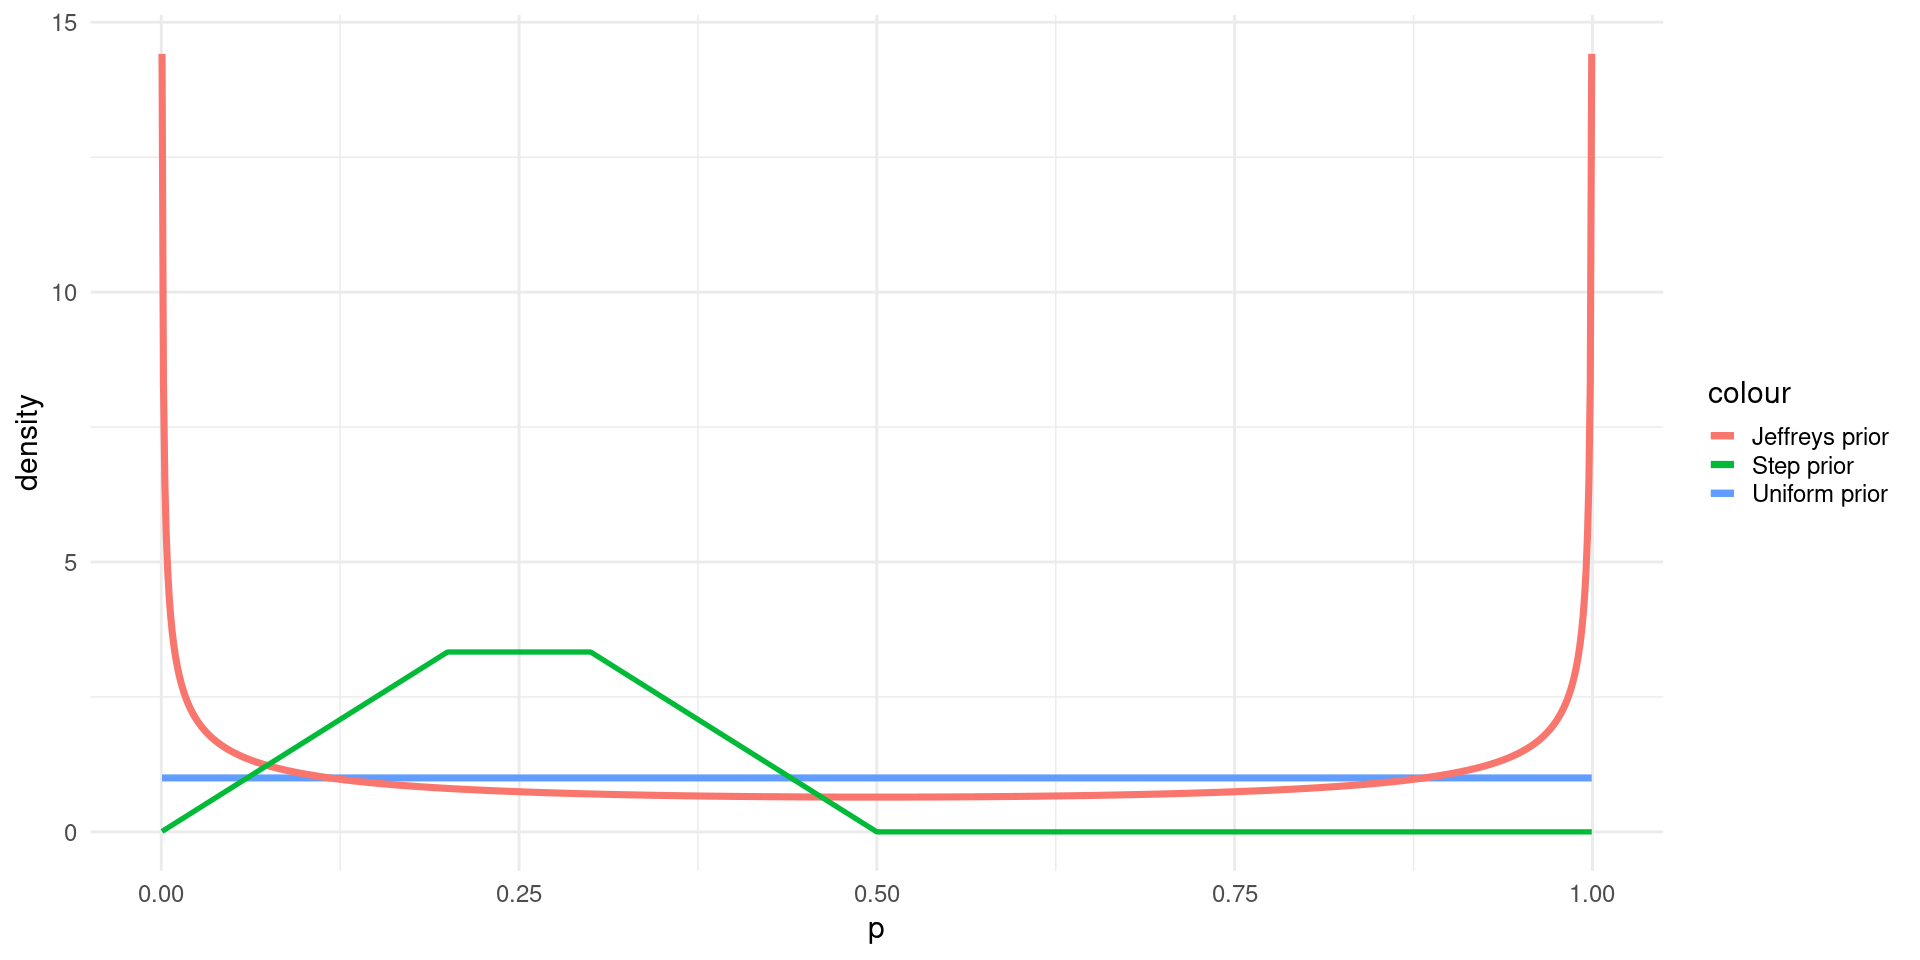

In [5]:
ggplot() +
geom_line(data = df, aes(x = p, y = prior_uni, colour = 'Uniform prior'), linewidth = 2) +
geom_line(data = df, aes(x = p, y = prior_jeffreys, colour = 'Jeffreys prior'), linewidth = 2) +
geom_line(data = df, aes(x = p, y = prior_step, colour = 'Step prior'), linewidth = 1.5) +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'density')

### 2) plot the posterior distribution and summarize the results computing the first two moments

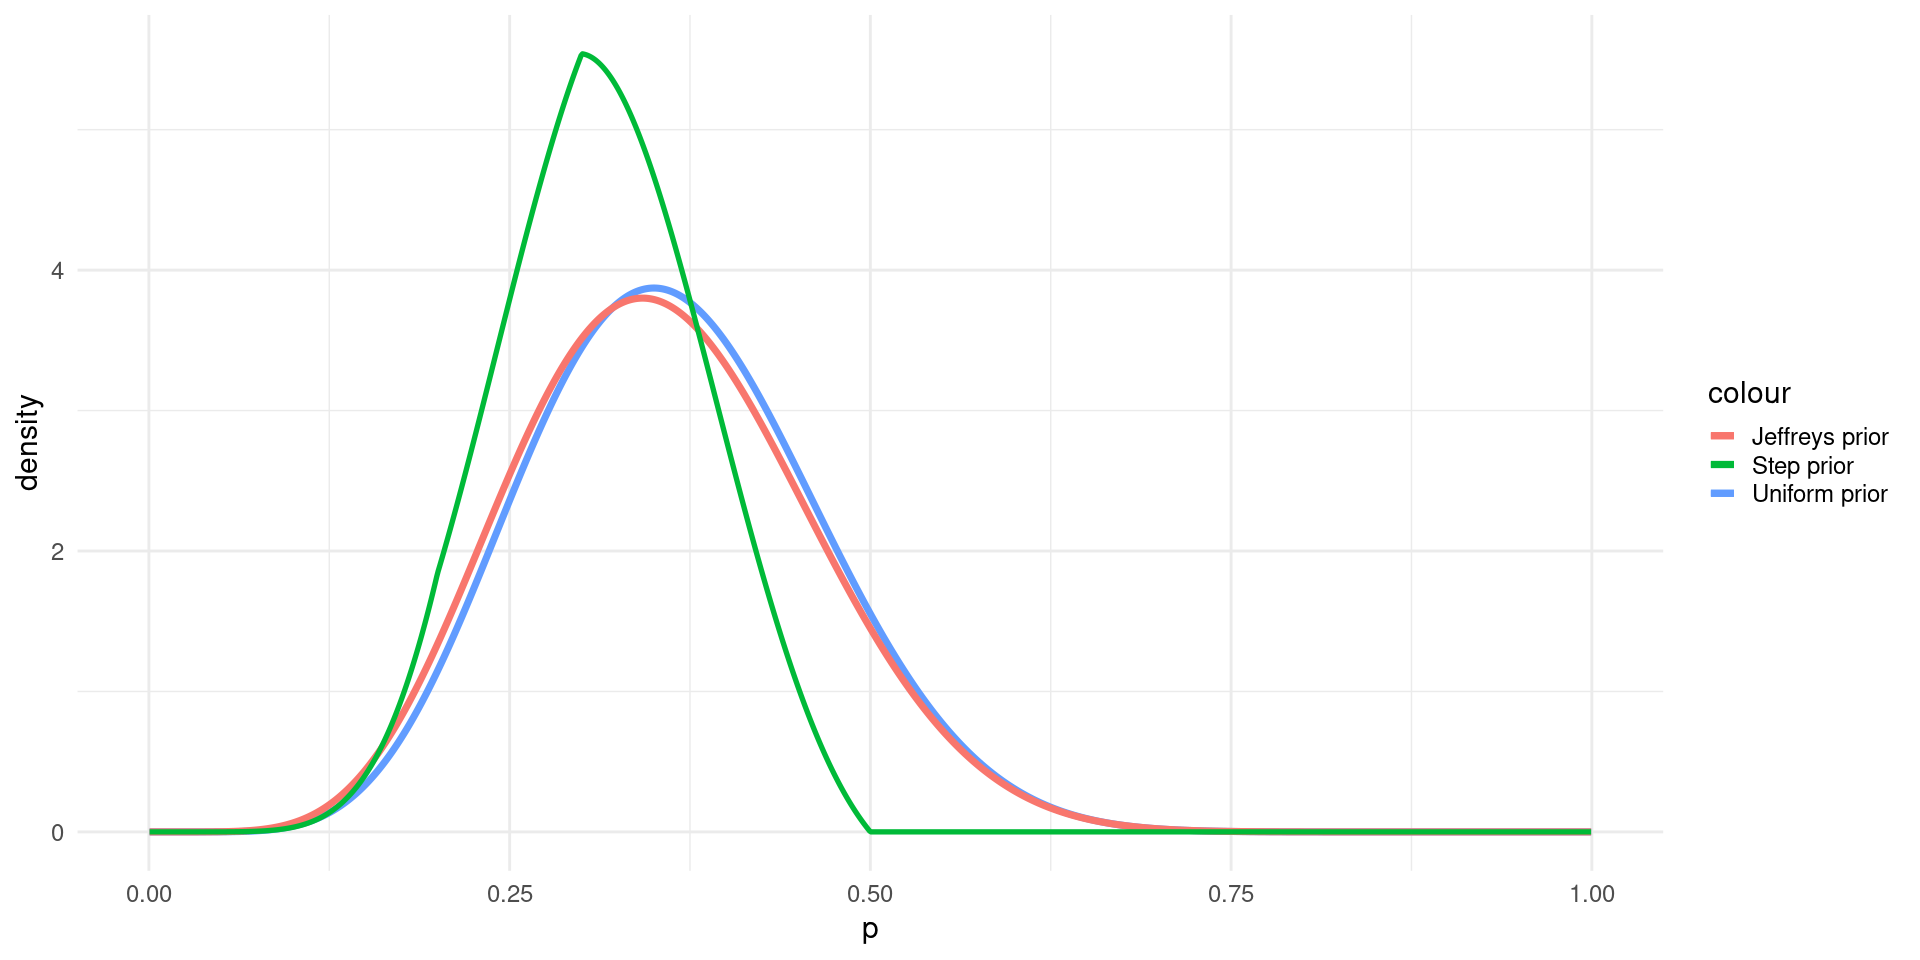

In [6]:
post_uni_nn <- likelihood*prior_uni
post_uni <- post_uni_nn/(delta_p*sum(post_uni_nn))

post_jeffreys_nn <- likelihood*prior_jeffreys
post_jeffreys <- post_jeffreys_nn/(delta_p*sum(post_jeffreys_nn))

post_step_nn <- likelihood*prior_step
post_step <- post_step_nn/(delta_p*sum(post_step_nn))

df1 <- data.frame(p, post_uni, post_jeffreys, post_step)

ggplot() +
geom_line(data = df1, aes(x = p, y = post_uni, colour = 'Uniform prior'), linewidth = 2) +
geom_line(data = df1, aes(x = p, y = post_jeffreys, colour = 'Jeffreys prior'), linewidth = 2) +
geom_line(data = df1, aes(x = p, y = post_step, colour = 'Step prior'), linewidth = 1.5) +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'density')

In [8]:
mean_uni <- round(sum(delta_p*post_uni*p), 3)
cat('First moment for uniform prior:', mean_uni, '\n')

mean_jeffreys <- round(sum(delta_p*post_jeffreys*p), 3)
cat('First moment for jeffreys prior:', mean_jeffreys, '\n')

mean_step <- round(sum(delta_p*post_step*p), 3)
cat('First moment for step prior:', mean_step, '\n')

cat('Second moment for uniform prior:',
    round(sum(delta_p*post_uni*p*p), 3), '\n')
cat('Second moment for jeffreys prior:',
    round(sum(delta_p*post_jeffreys*p*p), 3), '\n')
cat('Second moment for step prior:',
    round(sum(delta_p*post_step*p*p), 3), '\n')

First moment for uniform prior: 0.364 
First moment for jeffreys prior: 0.357 
First moment for step prior: 0.312 
Second moment for uniform prior: 0.142 
Second moment for jeffreys prior: 0.138 
Second moment for step prior: 0.102 


### 3) compute a 95% credibility interval and give the results in a summary table

In [9]:
limits_95 <- function(p, delta_p, post) {
    cs <- cumsum(post*delta_p)
    return( list('lower' = p[which(cs >= 0.025)[1]],
                 'upper' = p[which(cs >= 0.975)[1]-1]) )
}

In [10]:
limits_uni <- limits_95(p, delta_p, post_uni)
limits_jeffreys <- limits_95(p, delta_p, post_jeffreys)
limits_step <- limits_95(p, delta_p, post_step)

In [11]:
df_summary <- data.frame(prior = c('Uniform', 'Jeffreys', 'Step function'),
                         mean = c(mean_uni, mean_jeffreys, mean_step),
                         lower_limit = c(limits_uni$lower, limits_jeffreys$lower, limits_step$lower),
                         upper_limit = c(limits_uni$upper, limits_jeffreys$upper, limits_step$upper))
df_summary

prior,mean,lower_limit,upper_limit
<chr>,<dbl>,<dbl>,<dbl>
Uniform,0.364,0.1815,0.5685
Jeffreys,0.357,0.1725,0.5665
Step function,0.312,0.1755,0.4465


### 4) draw the limits on the plot of the posterior distribution

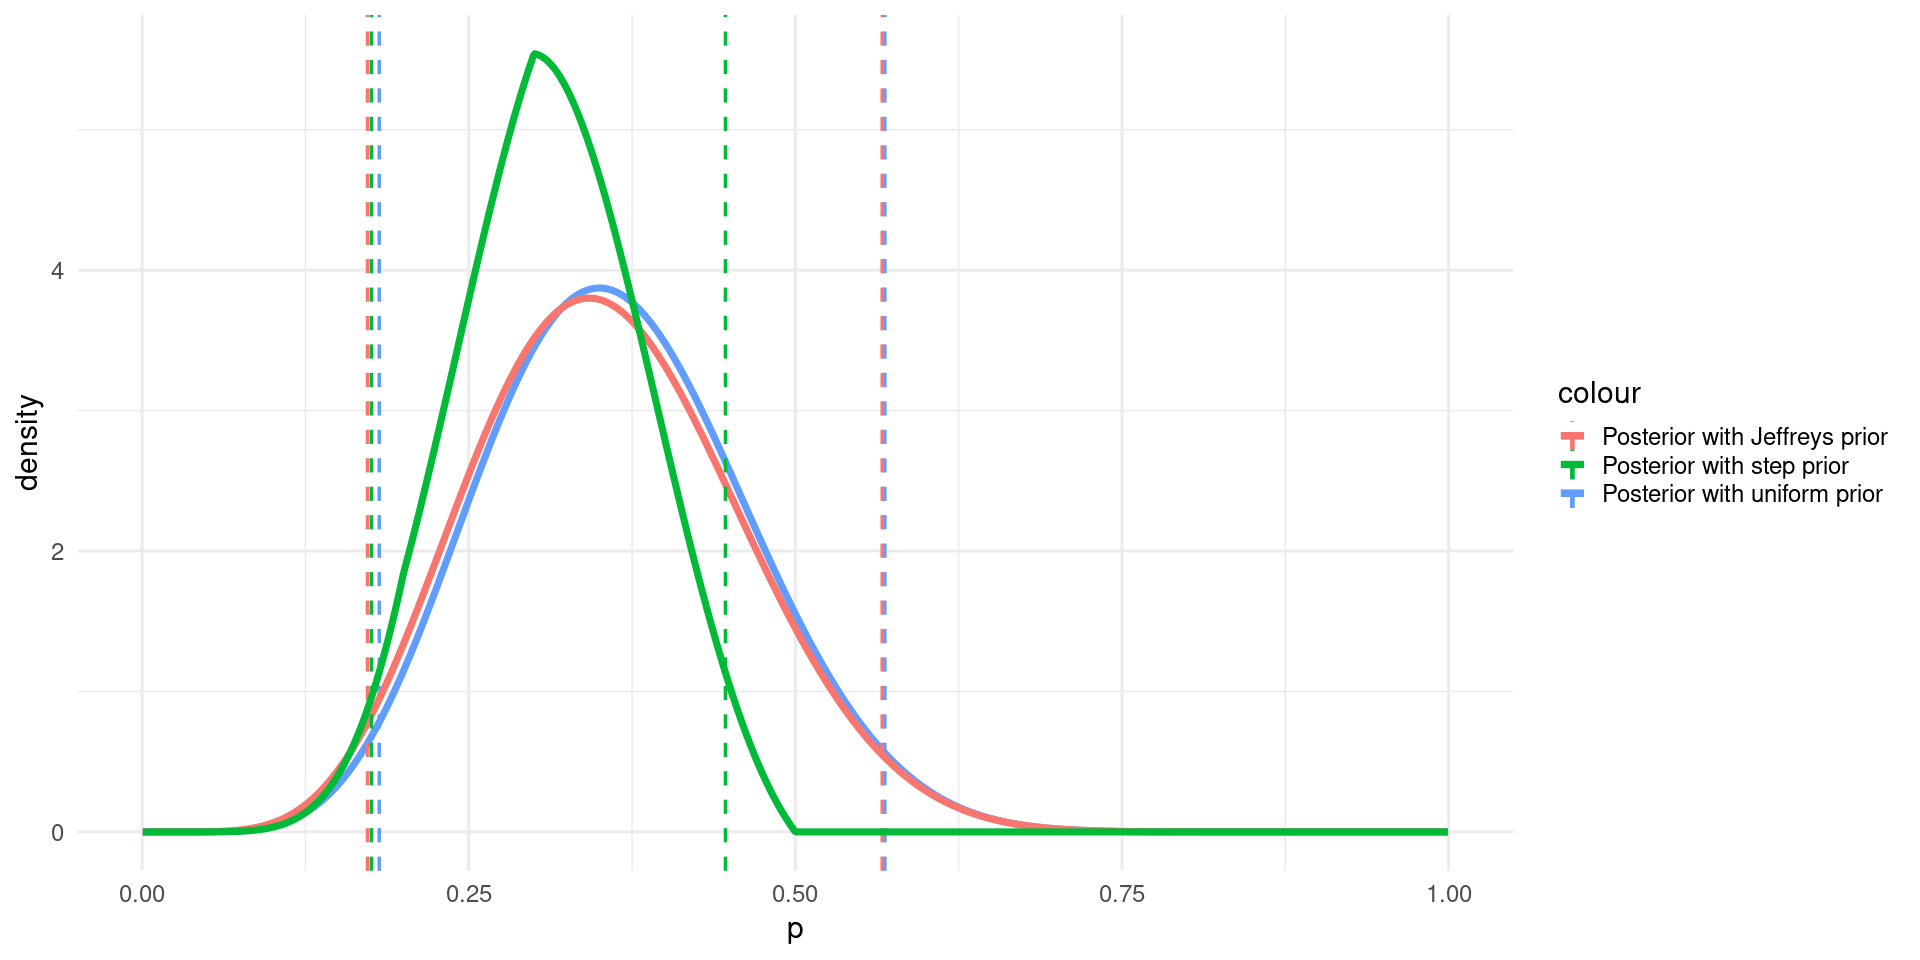

In [12]:
df <- data.frame(p, post_uni, post_jeffreys, post_step)

ggplot() +
geom_line(data = df, aes(x = p, y = post_uni, colour = 'Posterior with uniform prior'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = limits_uni$lower, colour='Posterior with uniform prior'),
           linewidth=1, linetype='dashed') +
geom_vline(data = df, aes(xintercept = limits_uni$upper, colour='Posterior with uniform prior'),
           linewidth=1, linetype='dashed') +



geom_line(data = df, aes(x = p, y = post_jeffreys, colour = 'Posterior with Jeffreys prior'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = limits_jeffreys$lower, colour='Posterior with Jeffreys prior'),
           linewidth=1, linetype='dashed') +
geom_vline(data = df, aes(xintercept = limits_jeffreys$upper, colour='Posterior with Jeffreys prior'),
           linewidth=1, linetype='dashed') +


geom_line(data = df, aes(x = p, y = post_step, colour = 'Posterior with step prior'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = limits_step$lower, colour='Posterior with step prior'),
           linewidth=1, linetype='dashed') +
geom_vline(data = df, aes(xintercept = limits_step$upper, colour='Posterior with step prior'),
           linewidth=1, linetype='dashed') +
theme_minimal(base_size=18) +

labs(x = 'p', y = 'density')

# Exercise 2

### Giardia cysts (https://www.cdc.gov/dpdx/giardiasis/index.html)
### is a parassite that can contaminate food, water, and surfaces, and they can cause giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects.
### - a group of researchers, working for a Human Health Department, work for determining the quality of stream water
### - they take n = 116 samples of one-liter water from sites identified to have a heavy environmental impact from birds and waterflow.
### - out of these samples, y = 17 samples contained Giard cystis
### - assuming $\pi$ as the probability that one-liter water sample contains Giardia cystis, find the posterior distribution for $\pi$

### 1) assuming a uniform prior distribution
### 2) assuming a Beta (1, 4) prior

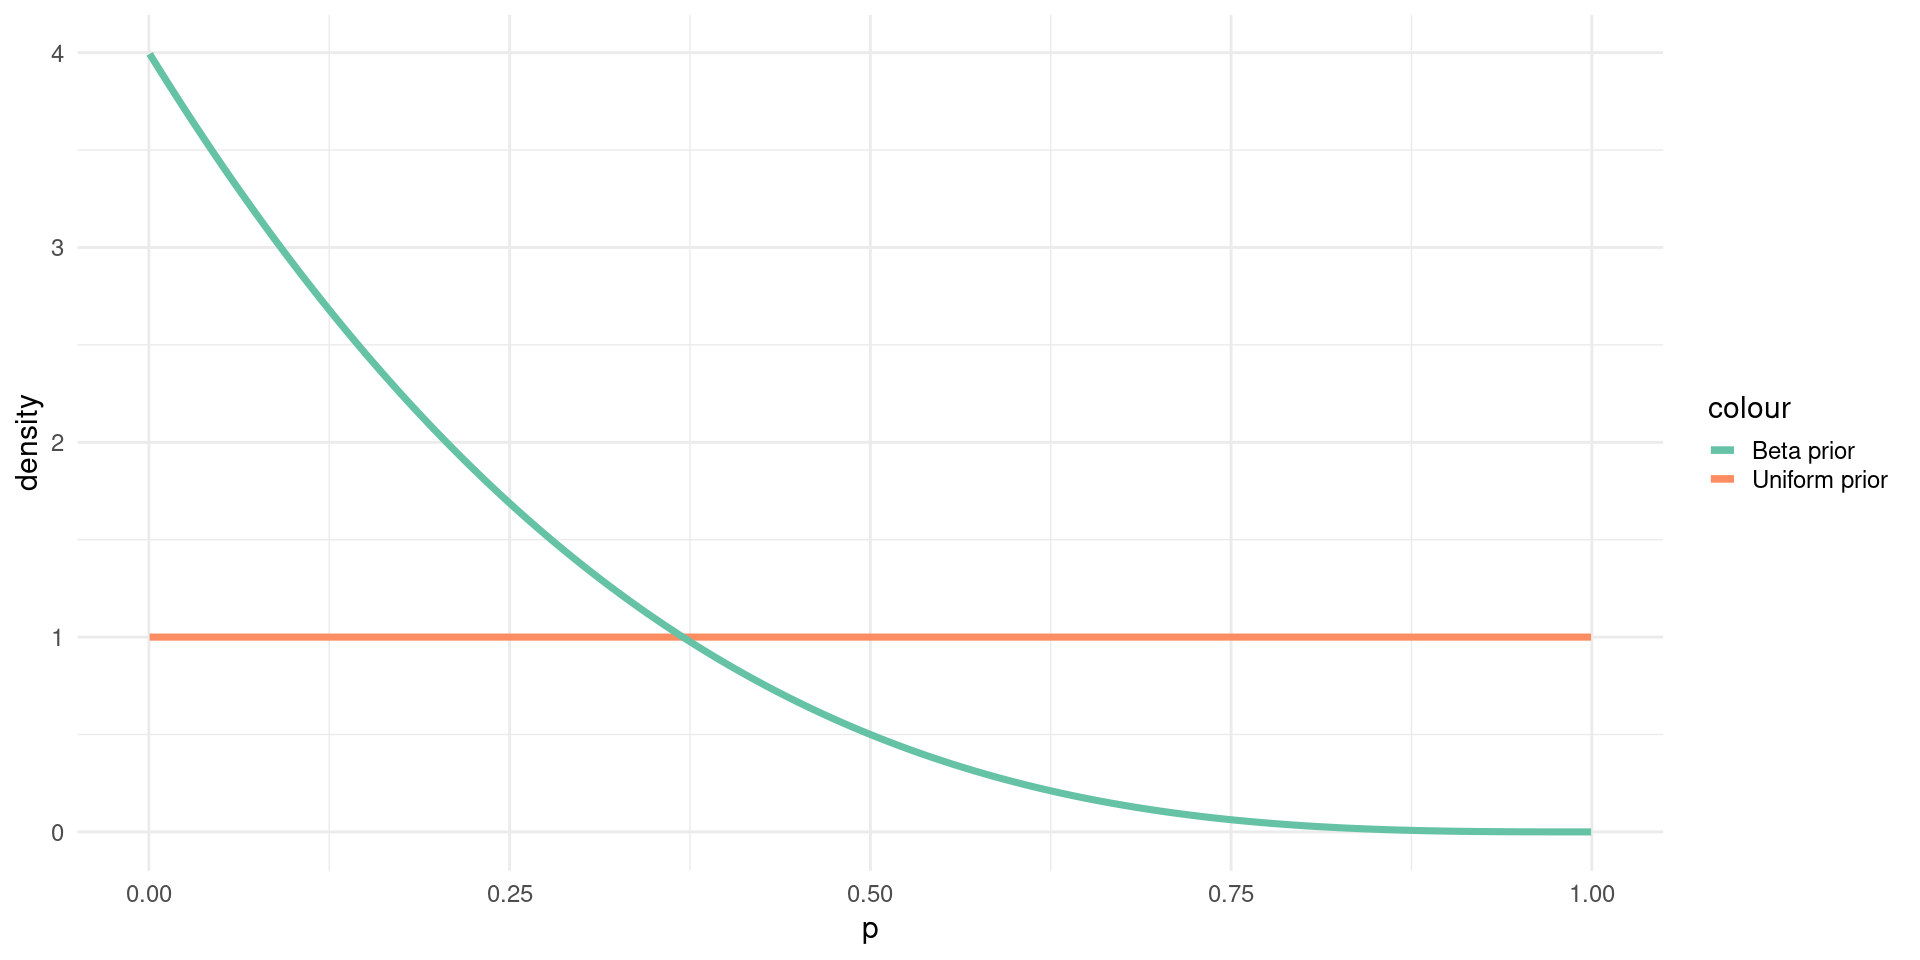

In [13]:
y <- 17
n <- 116

n_samples <- 1000
delta_p <- 1/n_samples
p <- seq(from = 1/(2*n_samples), by = 1/n_samples, length.out = n_samples)
likelihood <- dbinom(x = y, size = n, prob = p)

prior_uni <- dunif(p,0,1)
prior_beta <- dbeta(p, 1, 4)/(sum(delta_p*dbeta(p, 1, 4)))

df <- data.frame(p, prior_uni, prior_beta)


ggplot() +
geom_line(data = df, aes(x = p, y = prior_uni, colour = 'Uniform prior'), linewidth = 2) +
geom_line(data = df, aes(x = p, y = prior_beta, colour = 'Beta prior'), linewidth = 2) +

theme_minimal(base_size=18) +
labs(x = 'p', y = 'density') +
scale_color_brewer(palette = "Set2")

### - plot the posterior distribution and summarize the results computing the first two moments

For the beta prior with parameters $\alpha$, $\beta$ the posterior is also a beta function with parameters $\alpha_1=y+\alpha, \beta = n - y + \beta$

First moment for uniform prior: 0.153 
First moment for beta prior: 0.149 
Second moment for uniform prior: 0.024 
Second moment for beta prior: 0.023 


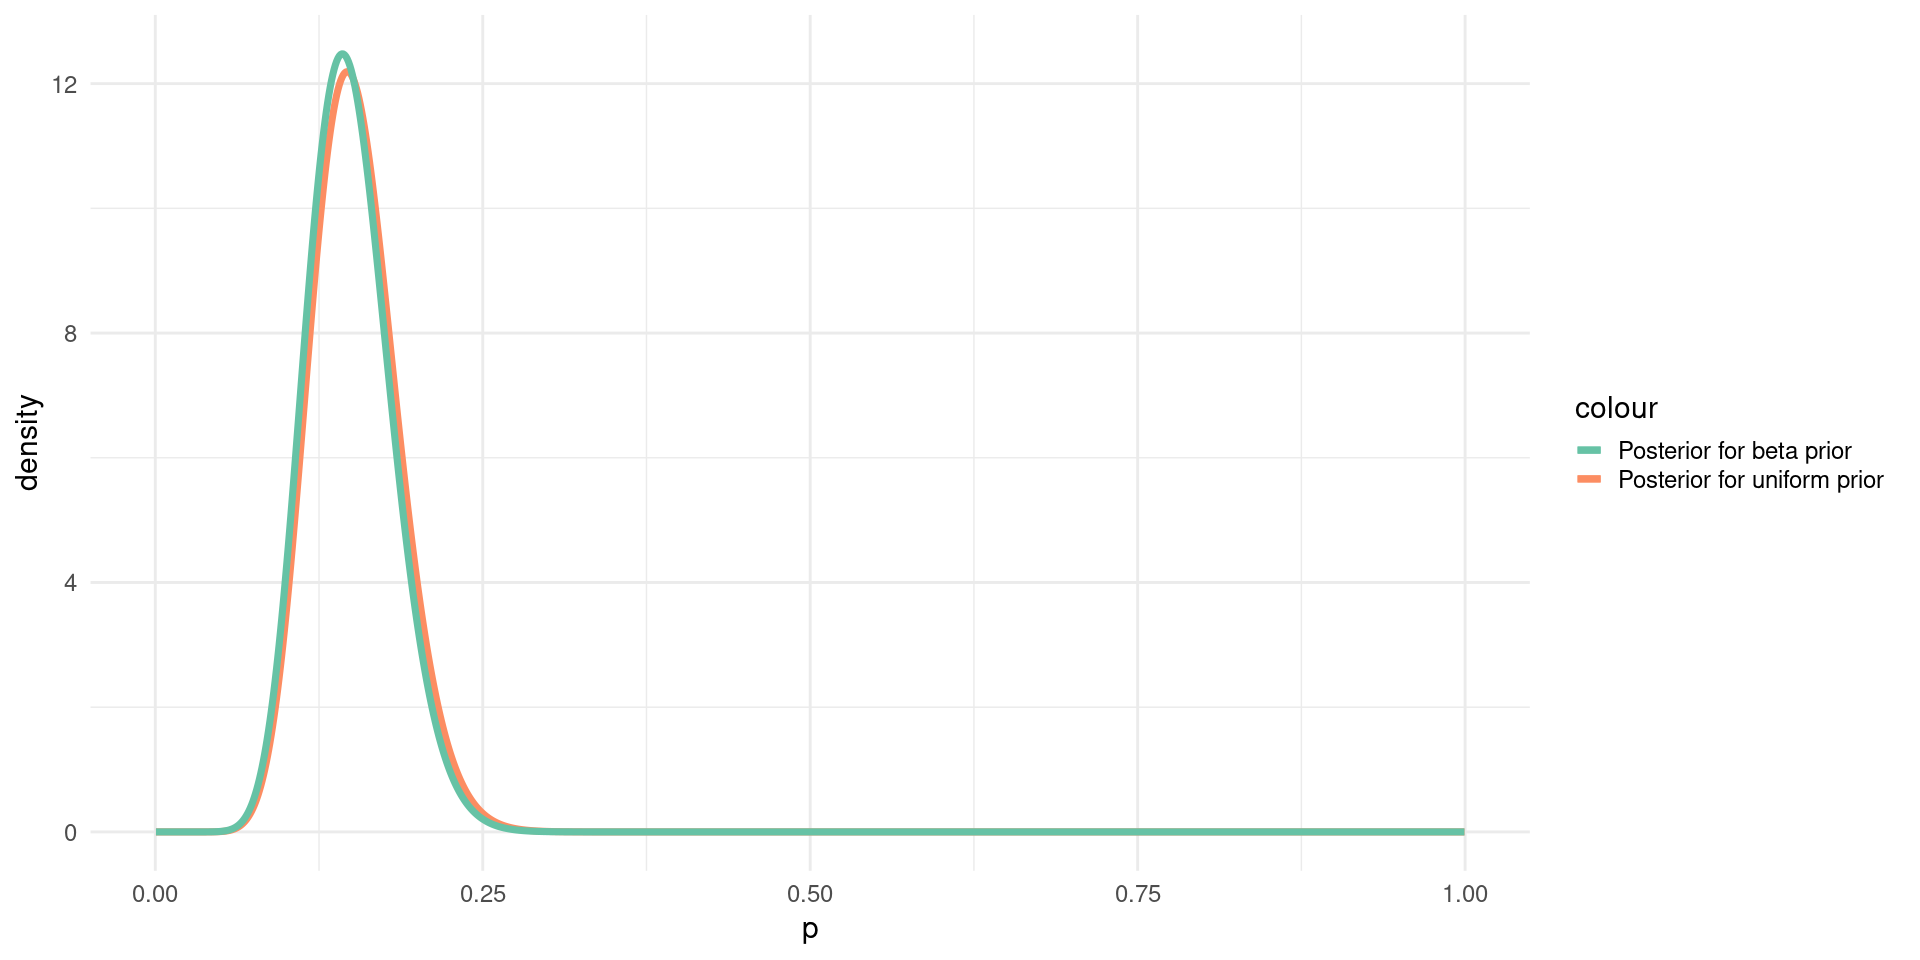

In [14]:
post_uni_nn <- likelihood*prior_uni
post_uni <- post_uni_nn/(delta_p*sum(post_uni_nn))

post_beta <- dbeta(p, y+1, n-y+4)

df1 <- data.frame(p, post_uni, post_beta)

ggplot() +
geom_line(data = df1, aes(x = p, y = post_uni, colour = 'Posterior for uniform prior'), linewidth = 2) +
geom_line(data = df1, aes(x = p, y = post_beta, colour = 'Posterior for beta prior'), linewidth = 2) +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'density') +
scale_color_brewer(palette = "Set2")


mean_uni <- round(sum(delta_p*post_uni*p), 3)
cat('First moment for uniform prior:', mean_uni, '\n')

mean_beta <- round(sum(delta_p*post_beta*p), 3)
cat('First moment for beta prior:', mean_beta, '\n')


cat('Second moment for uniform prior:',
    round(sum(delta_p*post_uni*p*p), 3), '\n')
cat('Second moment for beta prior:',
    round(sum(delta_p*post_beta*p*p), 3), '\n')

### - find a normal approximation for the posterior g (π∣y)

For the uniform prior we have normal approximation with:

$\mu = \frac{y}{n}$,

$\sigma = \frac{1}{n} \sqrt{\frac{y(n-y)}{n}}$

In [15]:
mu_uni <- y/n
sigma_uni <- 1/n*sqrt(y*(n-y)/n)

post_norm_uni <- dnorm(p, mu_uni, sigma_uni)

For the beta prior we have normal approximation with:

$\mu = \frac{y+\alpha-1}{n + \alpha + \beta - 2}$,

$\sigma = \frac{1}{\alpha + \beta + n - 2} \sqrt{\frac{\alpha + y -1 }{\alpha + y}}$

In [16]:
mu_beta <- (y+1-1)/(n+1+4-2)

sigma_beta <- sqrt( (1+y-1)/(1+y) )/(1+4+n-2)

post_norm_beta <- dnorm(p, mu_beta, sigma_beta)

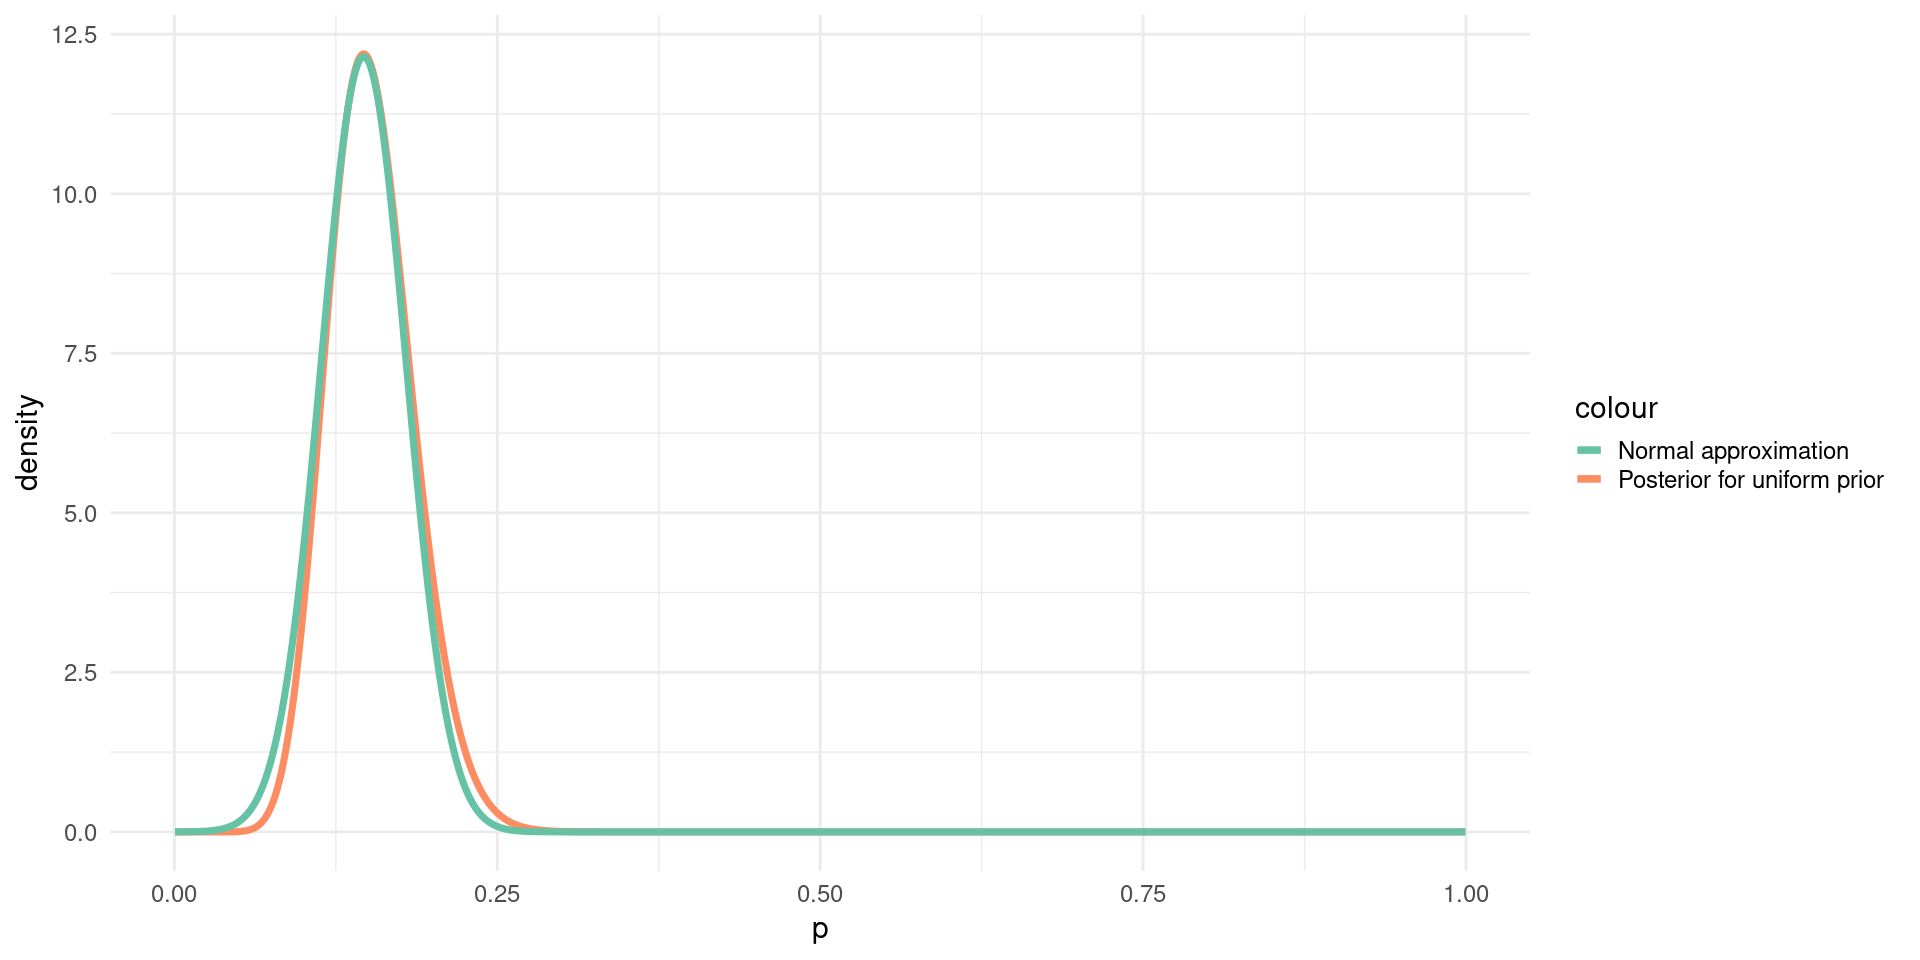

In [17]:
df2 <- data.frame(p, post_uni, post_norm_uni)

ggplot() +
geom_line(data = df2, aes(x = p, y = post_uni, colour = 'Posterior for uniform prior'), linewidth = 2) +
geom_line(data = df2, aes(x = p, y = post_norm_uni, colour = 'Normal approximation'), linewidth = 2) +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'density') +
scale_color_brewer(palette = "Set2")

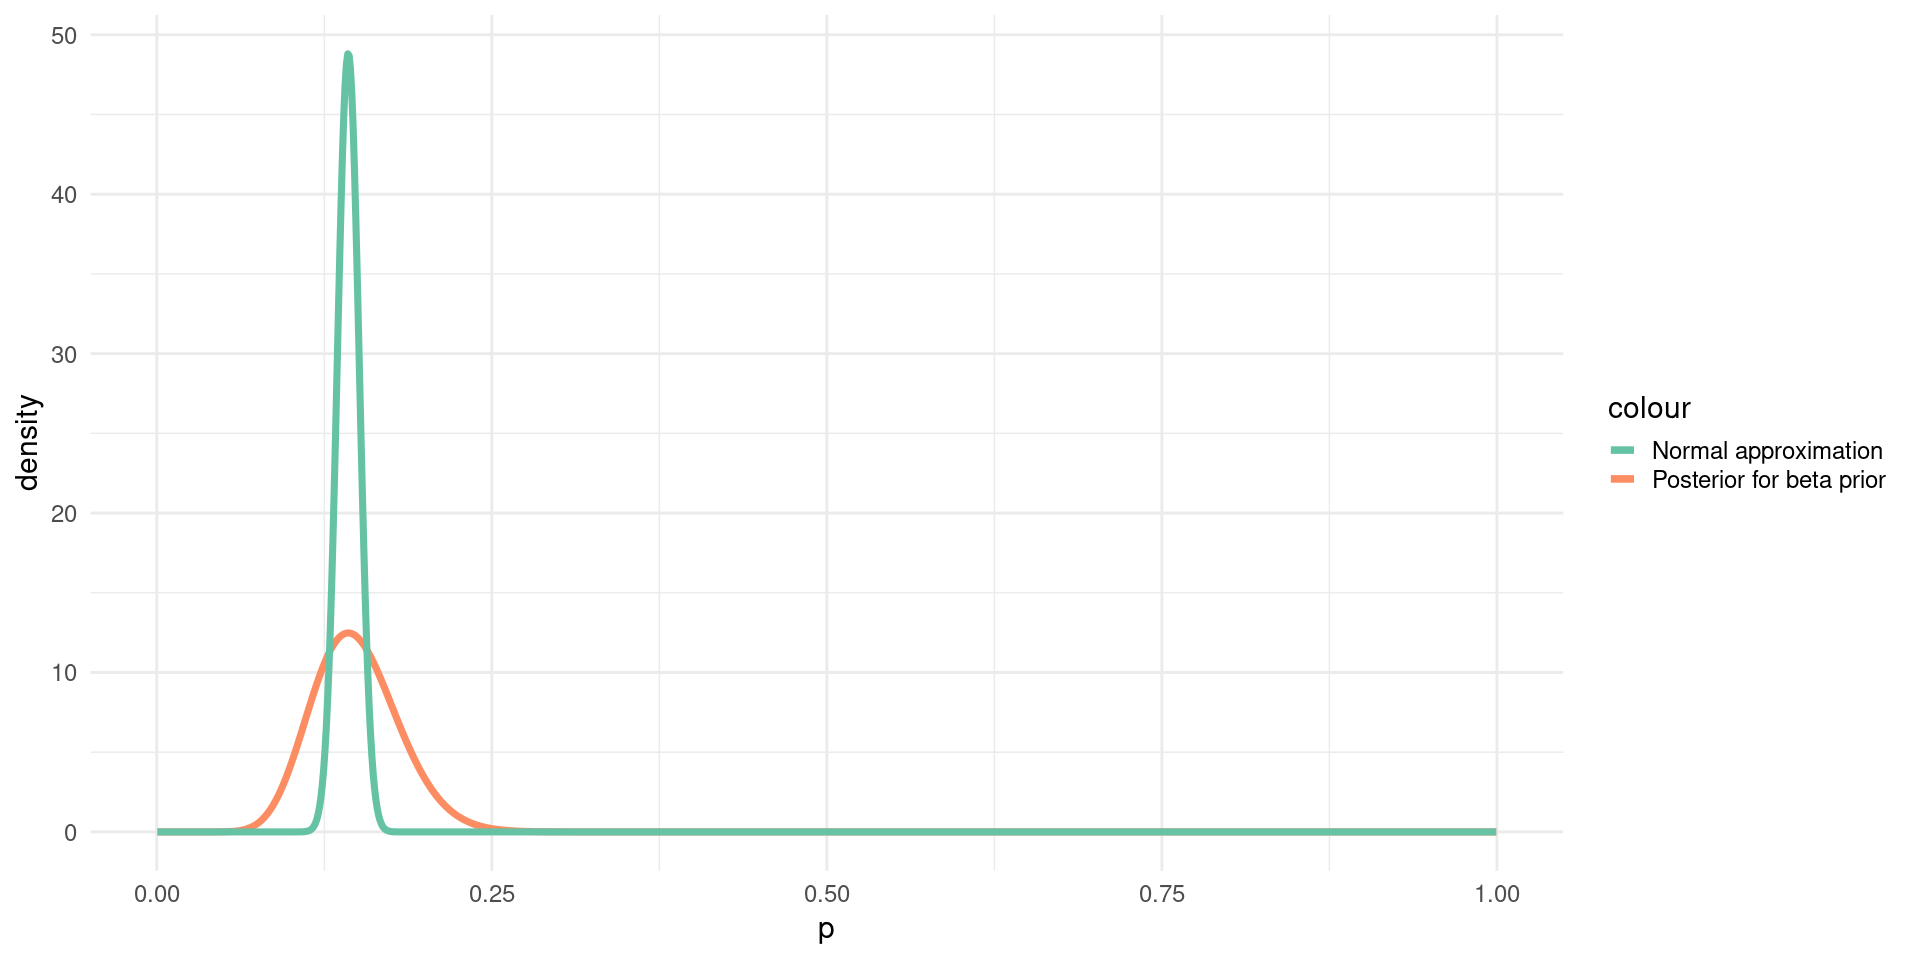

In [18]:
df3 <- data.frame(p, post_beta, post_norm_beta)

ggplot() +
geom_line(data = df3, aes(x = p, y = post_beta, colour = 'Posterior for beta prior'), linewidth = 2) +
geom_line(data = df3, aes(x = p, y = post_norm_beta, colour = 'Normal approximation'), linewidth = 2) +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'density') +
scale_color_brewer(palette = "Set2")

### - compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table

Using function from exercise 1:

In [19]:
limits_uni <- limits_95(p, delta_p, post_uni)
limits_beta <- limits_95(p, delta_p, post_beta)
limits_norm_uni <- limits_95(p, delta_p, post_norm_uni)
limits_norm_beta <- limits_95(p, delta_p, post_norm_beta)


df_summary <- data.frame(prior = c('Posterior for uniform prior', 'Posterior for beta prior',
                                   'Normal for uniform prior', 'Normal for uniform prior'),
                         mean = c(mean_uni, mean_beta, mu_uni, mu_beta),
                         lower_limit = c(limits_uni$lower, limits_beta$lower,
                                         limits_norm_uni$lower, limits_norm_beta$lower),
                         upper_limit = c(limits_uni$upper, limits_beta$upper, 
                                         limits_norm_uni$upper, limits_norm_beta$upper))
df_summary

prior,mean,lower_limit,upper_limit
<chr>,<dbl>,<dbl>,<dbl>
Posterior for uniform prior,0.1530000,0.0935,0.2215
Posterior for beta prior,0.1490000,0.0915,0.2165
Normal for uniform prior,0.1465517,0.0825,0.2095
Normal for uniform prior,0.1428571,0.1265,0.1575


### - add the limits on the plot of the posterior distributions

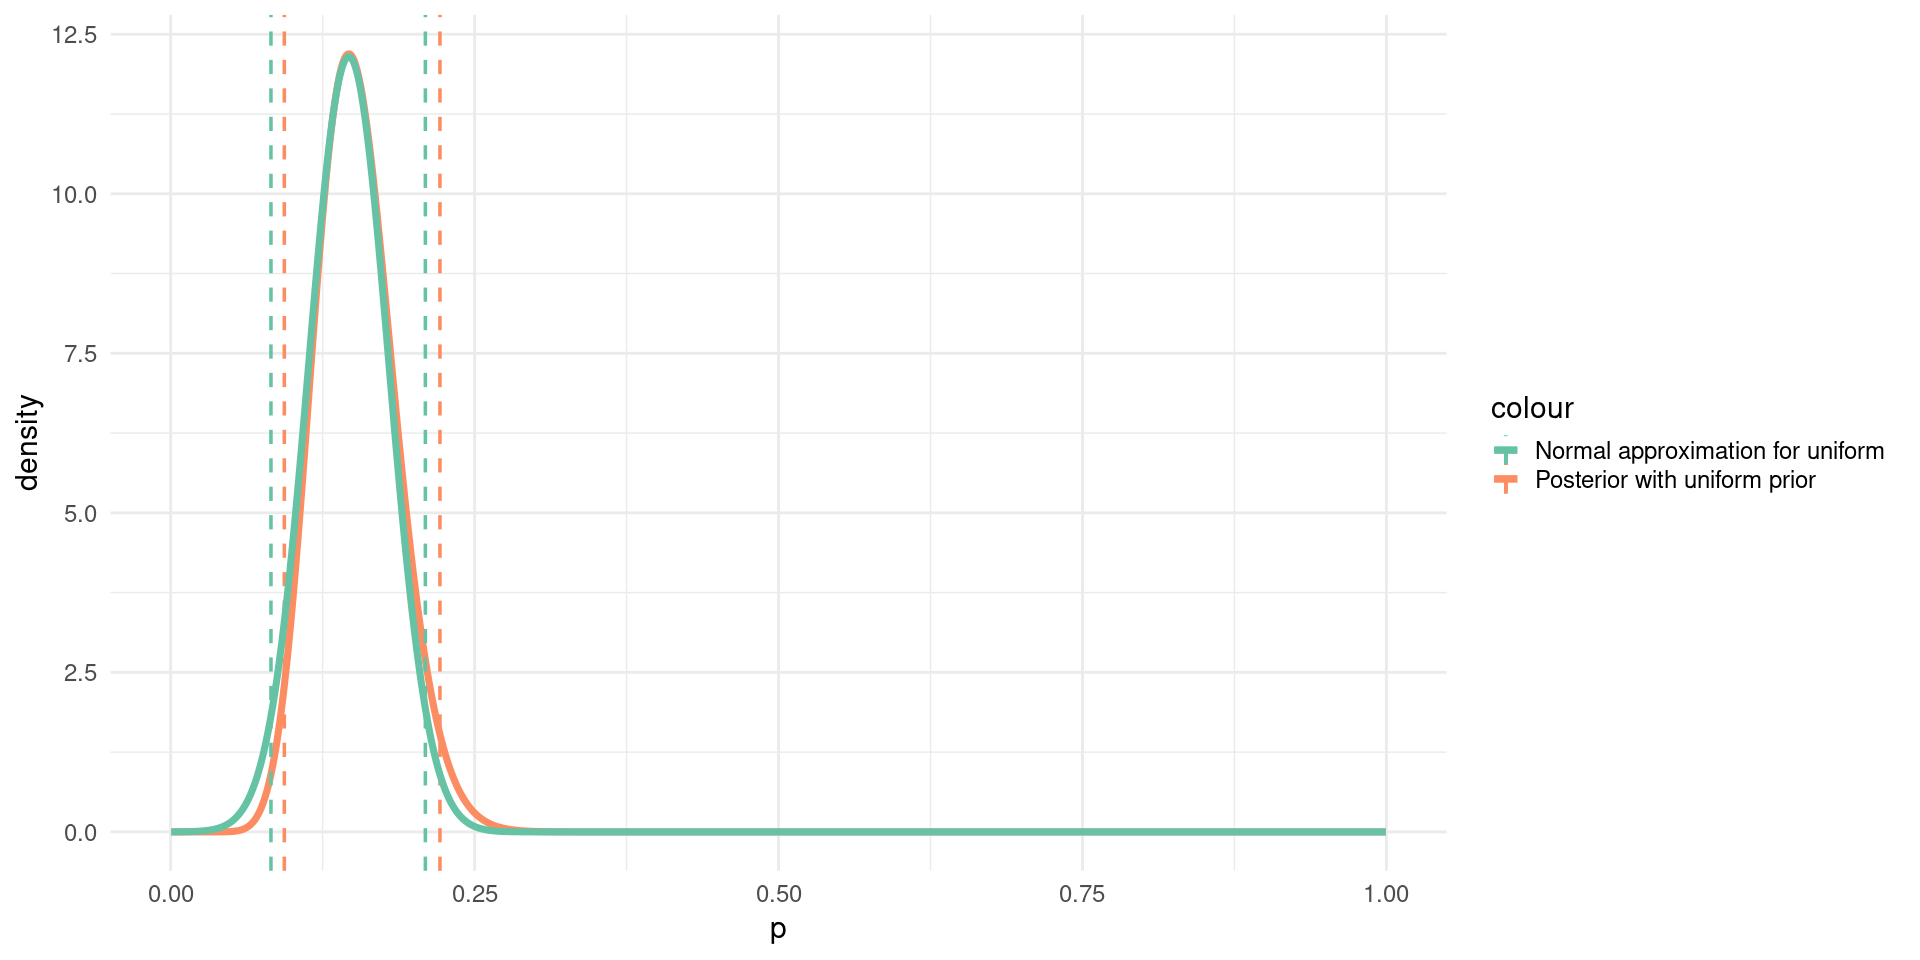

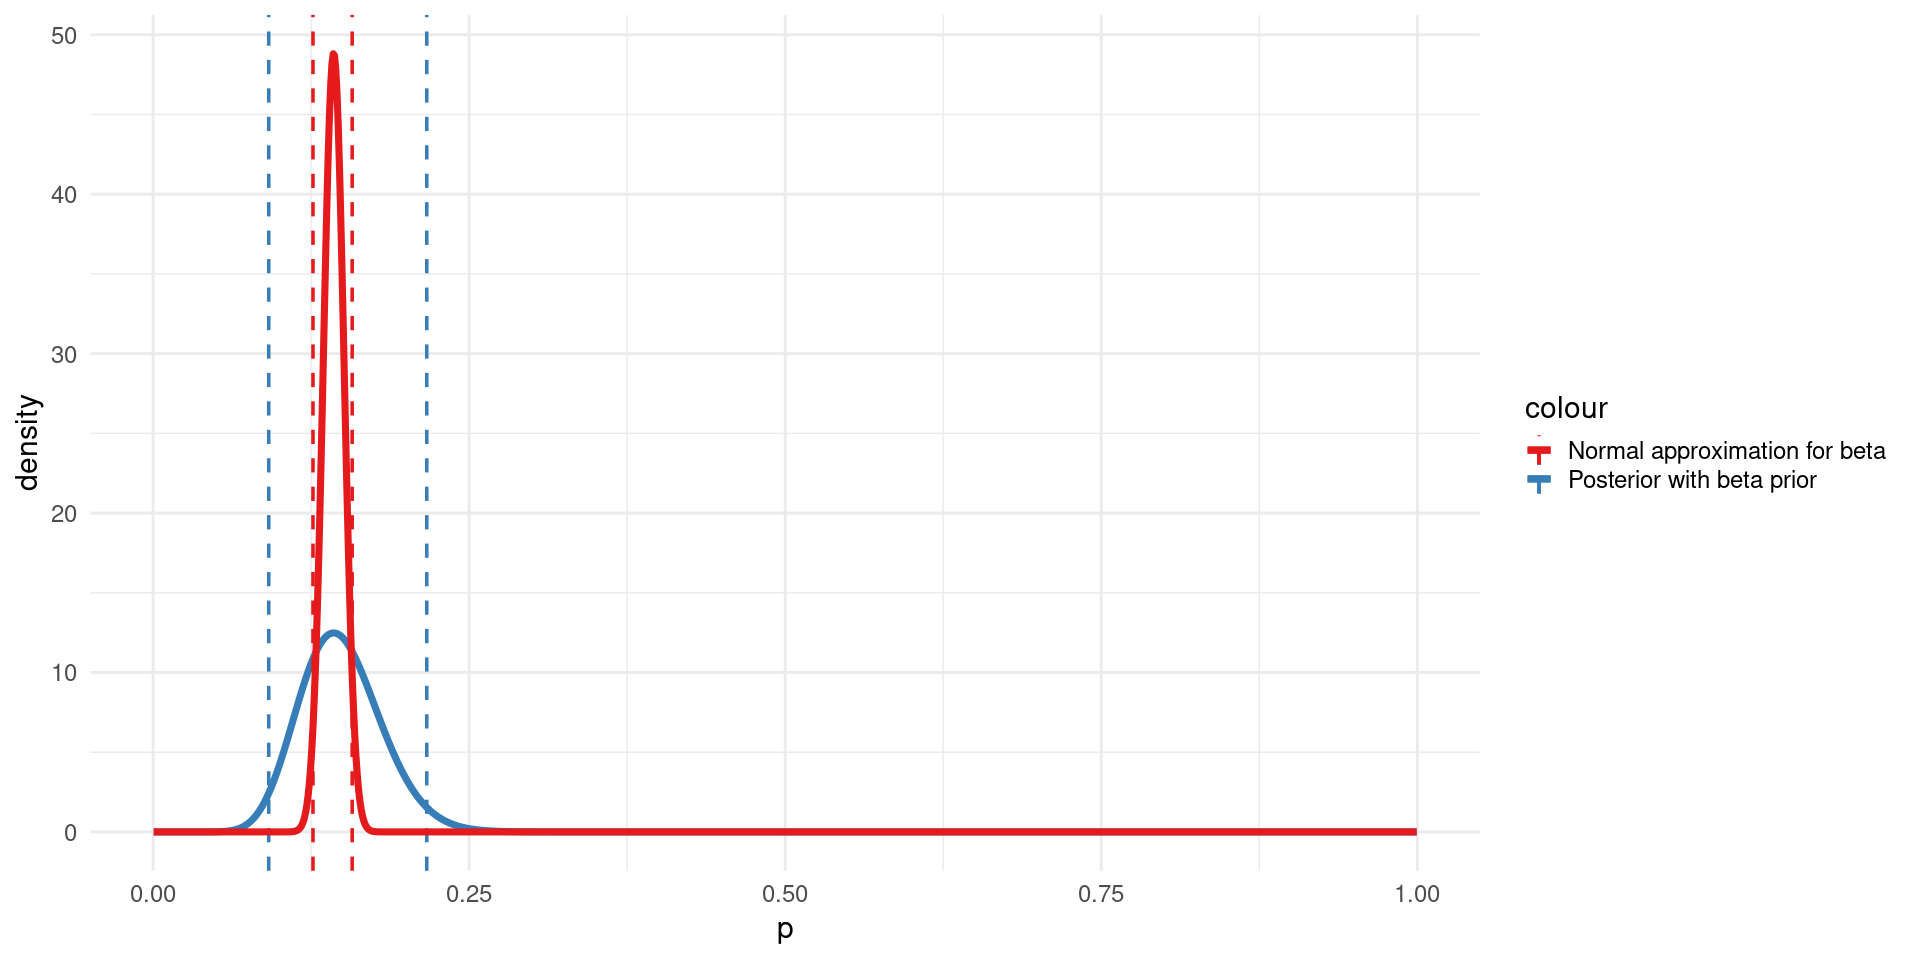

In [20]:
df <- data.frame(p, post_uni, post_beta)

ggplot() +
geom_line(data = df, aes(x = p, y = post_uni, colour = 'Posterior with uniform prior'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = limits_uni$lower, colour='Posterior with uniform prior'),
           linewidth=1, linetype='dashed') +
geom_vline(data = df, aes(xintercept = limits_uni$upper, colour='Posterior with uniform prior'),
           linewidth=1, linetype='dashed') +

geom_line(data = df, aes(x = p, y = post_norm_uni, colour = 'Normal approximation for uniform'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = limits_norm_uni$lower, colour='Normal approximation for uniform'),
           linewidth=1, linetype='dashed') +
geom_vline(data = df, aes(xintercept = limits_norm_uni$upper, colour='Normal approximation for uniform'),
           linewidth=1, linetype='dashed') +

theme_minimal(base_size=18) +
labs(x = 'p', y = 'density') +
scale_color_brewer(palette = "Set2")



ggplot() +
geom_line(data = df, aes(x = p, y = post_beta, colour = 'Posterior with beta prior'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = limits_beta$lower, colour='Posterior with beta prior'),
           linewidth=1, linetype='dashed') +
geom_vline(data = df, aes(xintercept = limits_beta$upper, colour='Posterior with beta prior'),
           linewidth=1, linetype='dashed') +

geom_line(data = df, aes(x = p, y = post_norm_beta, colour = 'Normal approximation for beta'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = limits_norm_beta$lower, colour='Normal approximation for beta'),
           linewidth=1, linetype='dashed') +
geom_vline(data = df, aes(xintercept = limits_norm_beta$upper, colour='Normal approximation for beta'),
           linewidth=1, linetype='dashed') +

theme_minimal(base_size=18) +
labs(x = 'p', y = 'density') +
scale_color_brewer(palette = "Set1")

# Exercise 3

### A coin is flipped n = 30 times with the following outcomes:

### T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H

In [21]:
n <- 30

r <- 15 #number of tails

Measurement model:

- p: probability of getting a head in one toss

- p is const in all tosses

- all tosses are independent

Each toss is an independent Bernoulli trial, thus Likelihood function is the binomial distribution.

### a) Assuming a flat prior and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [22]:
n_samples <- 5000
delta_p <- 1/n_samples
p <- seq(from = 1/(2*n_samples), by = 1/n_samples, length.out = n_samples)
likelihood <- dbinom(x = r, size = n, prob = p)

In the case of a flat prior, Posterior pdf is proportional to the Likelihood

In [23]:
p_prior_flat <- dbeta(p, 1, 1) #beta gives uniform with these parameters

#here I manually calculate the posterior, although I can use properties of beta
#as it is shown later
p_post_flat_notnormalised <- dbinom(x = r, size = n, prob = p)

p_post_flat <- p_post_flat_notnormalised/(delta_p*sum(p_post_flat_notnormalised))

Taking beta as a prior:

I expect that the coin is fair, so I take equal $\alpha$ and $\beta$ and they are relatively large, so that the distribution is narrow near mean 0.5.

In [24]:
alpha <- 20
beta <- 20

p_prior_beta <- dbeta(p, alpha, beta)

For the beta prior with parameters $\alpha$, $\beta$ the posterior is also a beta function with parameters $\alpha_1=r+\alpha, \beta = n - r + \beta$

In [25]:
p_post_beta <- dbeta(p, r+alpha, n-r+beta)

In [26]:
df <- data.frame(p, likelihood, p_prior_flat, p_post_flat,
                 p_prior_beta, p_post_beta)

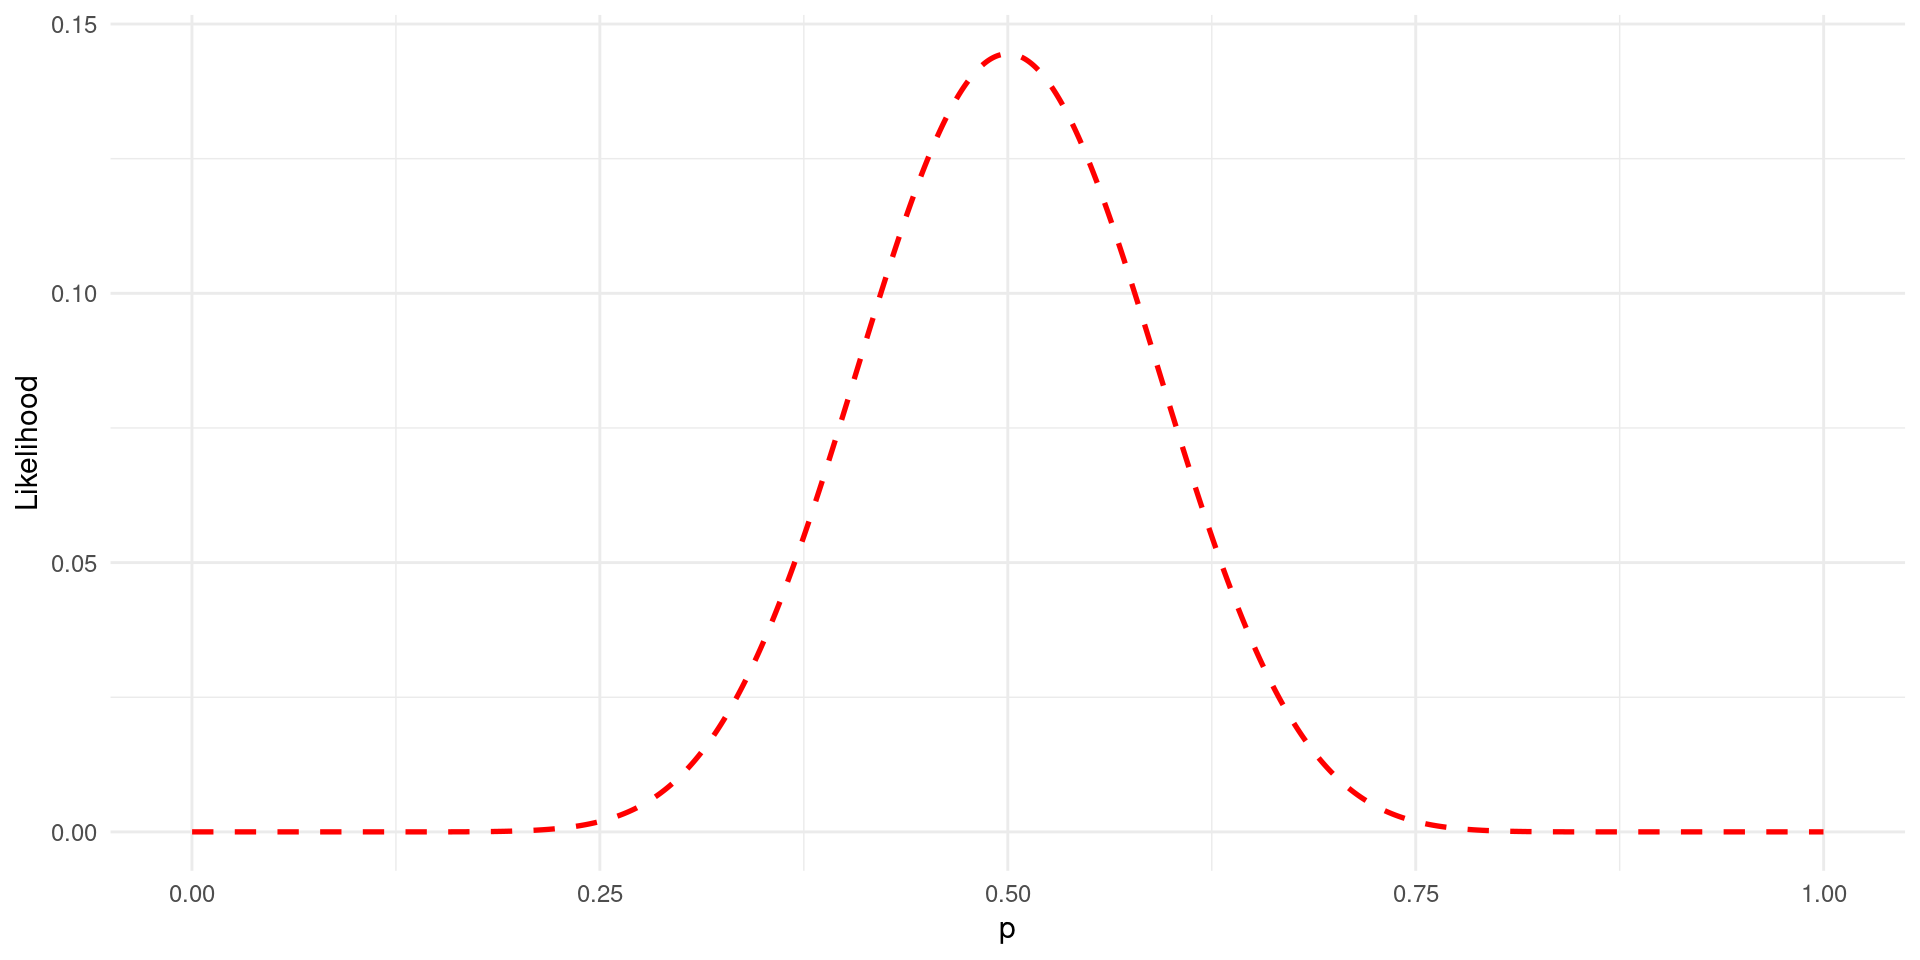

In [27]:
ggplot() +
geom_line(data = df, aes(x = p, y = likelihood),
          linetype = 'dashed', linewidth = 1.5, colour = 'red') +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'Likelihood')

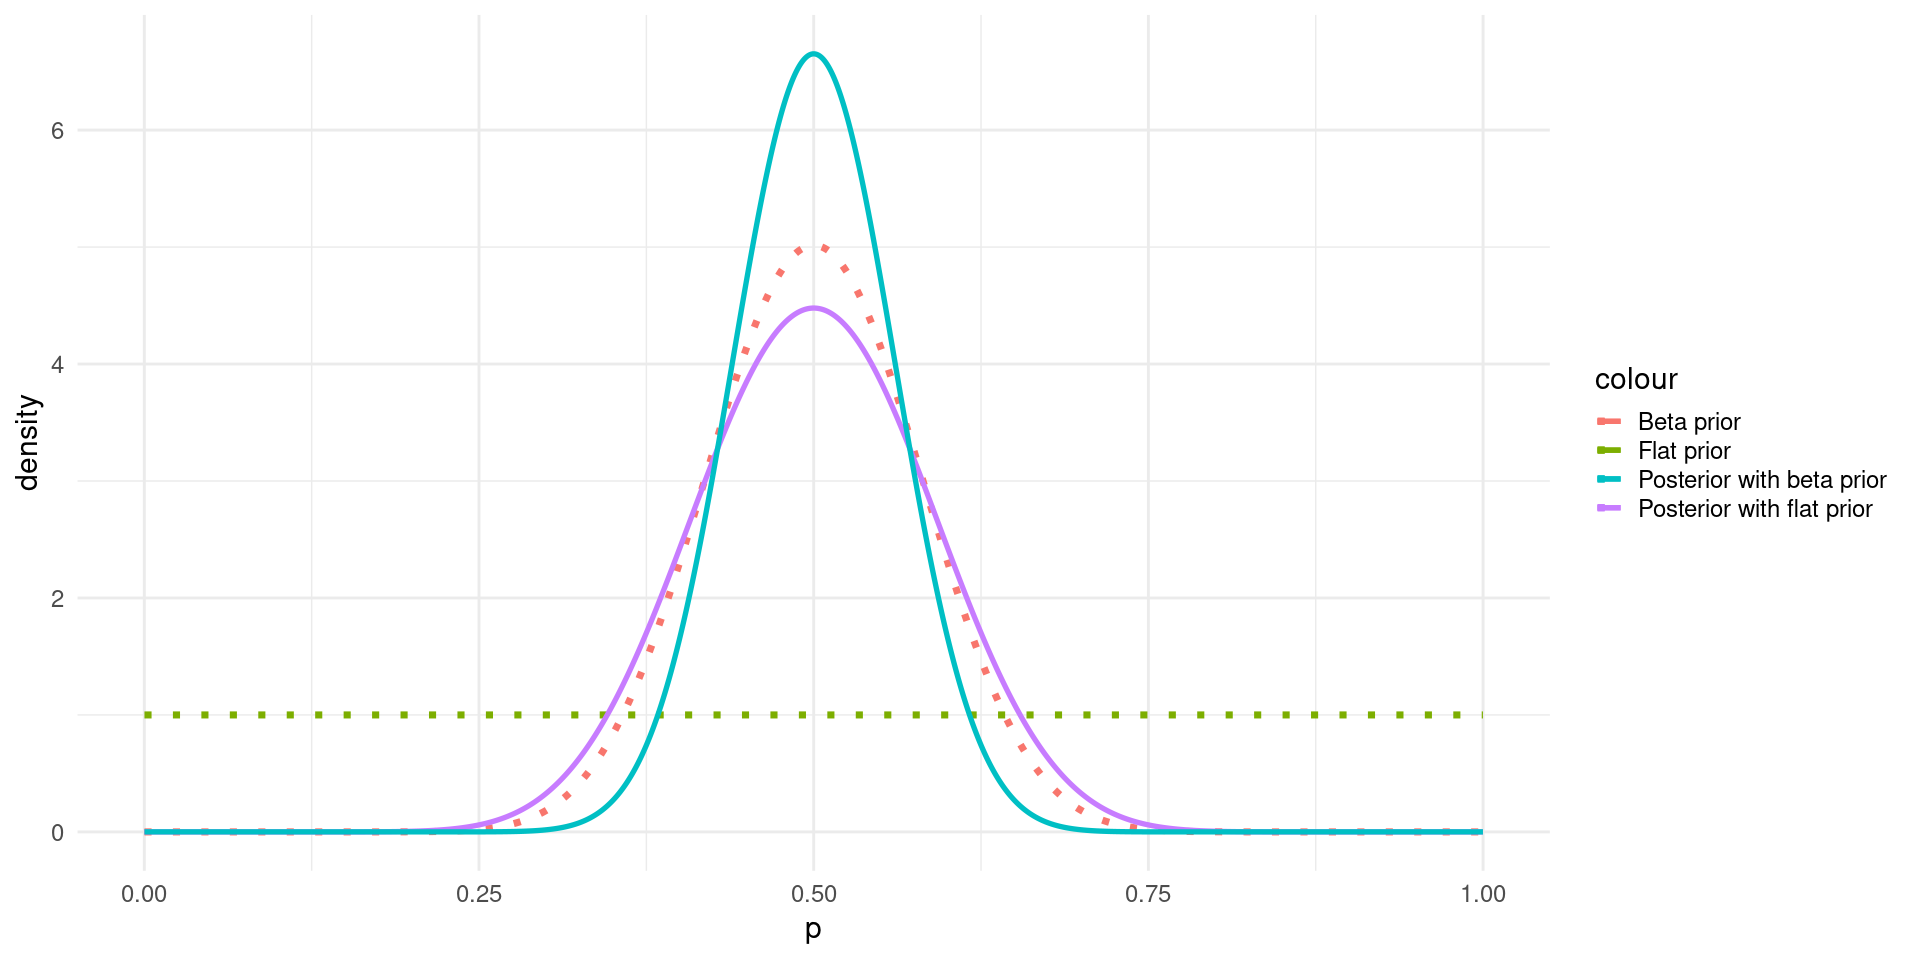

In [28]:
ggplot() +
geom_line(data = df, aes(x = p, y = p_prior_flat, colour = 'Flat prior'),
          linetype = 'dotted', linewidth = 2) +
geom_line(data = df, aes(x = p, y = p_prior_beta, colour = 'Beta prior'),
          linetype = 'dotted', linewidth = 2) +
geom_line(data = df, aes(x = p, y = p_post_flat, colour = 'Posterior with flat prior'),
          linewidth = 1.5) +
geom_line(data = df, aes(x = p, y = p_post_beta, colour = 'Posterior with beta prior'),
          linewidth = 1.5) +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'density')

### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [29]:
max_flat <- df[ which.max(df[,4]), 1 ]
cat('Most probable value in flat prior case:', round(max_flat,2))

Most probable value in flat prior case: 0.5

In [30]:
max_beta <- df[ which.max(df[,6]), 1 ]
cat('Most probable value in beta prior case:', round(max_beta,2))

Most probable value in beta prior case: 0.5

In [31]:
q <- 0.05

lower_flat <- qbeta(q, 1+r, n-r+1)
upper_flat <- qbeta(1-q, 1+r, n-r+1)

lower_beta <- qbeta(q, alpha+r, n-r+beta)
upper_beta <- qbeta(1-q, alpha+r, n-r+beta)

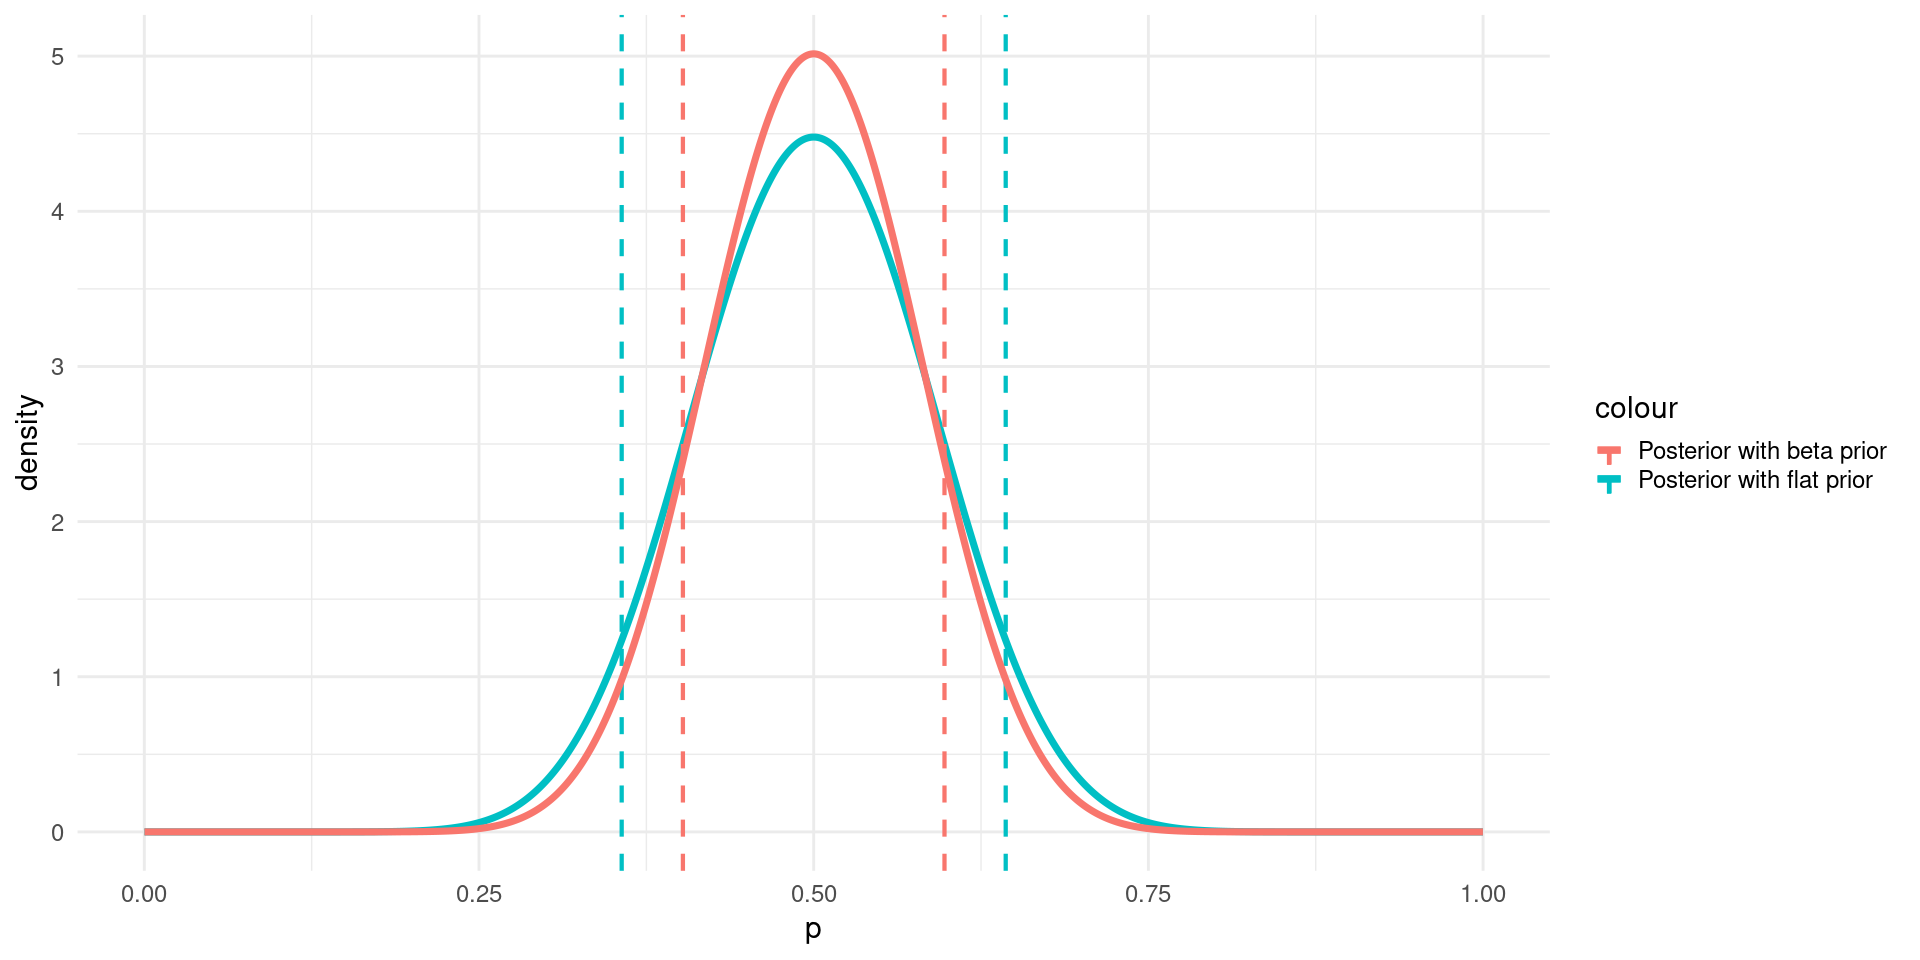

In [32]:
ggplot() +
geom_line(data = df, aes(x = p, y = p_post_flat, colour = 'Posterior with flat prior'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = lower_flat, colour='Posterior with flat prior'),
           linewidth=1.2, linetype='dashed') +
geom_vline(data = df, aes(xintercept = upper_flat, colour='Posterior with flat prior'),
           linewidth=1.2, linetype='dashed') +


geom_line(data = df, aes(x = p, y = p_prior_beta, colour = 'Posterior with beta prior'),
          linewidth = 2) +
geom_vline(data = df, aes(xintercept = lower_beta, colour='Posterior with beta prior'),
           linewidth=1.2, linetype='dashed') +
geom_vline(data = df, aes(xintercept = upper_beta, colour='Posterior with beta prior'),
           linewidth=1.2, linetype='dashed') +
theme_minimal(base_size=18) +
labs(x = 'p', y = 'density')


In [33]:
cat('95% c.i. for the case with flat prior: [', round(lower_flat,2), ', ', round(upper_flat,2), ']', sep='')

95% c.i. for the case with flat prior: [0.36, 0.64]

In [34]:
cat('95% c.i. for the case with beta prior: [', round(lower_beta,2), ', ', round(upper_beta,2), ']', sep='')

95% c.i. for the case with beta prior: [0.4, 0.6]

### c) Repeat the same analysis assuming a sequential analysis of the data 1. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [35]:
# 0 for tail and 1 for head
data_exp <- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1)

n_samples <- 5000
delta_p <- 1/n_samples
p <- seq(from = 1/(2*n_samples), by = 1/n_samples, length.out = n_samples)


analysis <- function(alpha, beta, data_exp) {
    
    n <- length(data_exp)
    r <- 0
    
    lower <- rep(0, n)
    upper <- rep(0, n)
    most <- rep(0, 30)

    for (i in 1:n) {
        if (data_exp[i] == 1) { r <- r + 1} #update rate

        #update alpha, beta based on data:
        alpha_new <- r + alpha
        beta_new <- i - r + beta
        
        p_post_beta <- dbeta(p, alpha_new, beta_new)
        
        lower[i] <- qbeta(0.05, alpha_new, beta_new)
        upper[i] <- qbeta(0.95, alpha_new, beta_new)
        
        most[i] <- p[which.max(p_post_beta)]  
    
    }
    df2 <- data.frame(a=1:n, most, lower, upper)
    
    ggplot() +
    geom_line(data = df2, aes(x = a, y = most, colour='most probable value'), linewidth=1.5) + 
    geom_line(data = df2, aes(x = a, y = lower, colour='lower limit'), linewidth=1.5) + 
    geom_line(data = df2, aes(x = a, y = upper, colour='upper limit'), linewidth=1.5) +
    
    geom_point(data = df2, aes(x = a, y = most, colour='most probable value'), size=5) + 
    geom_point(data = df2, aes(x = a, y = lower, colour='lower limit'), size=5) + 
    geom_point(data = df2, aes(x = a, y = upper, colour='upper limit'), size=5) +
    
    theme_minimal(base_size=18) +
    labs(x = 'number of tosses', y = 'p')

}


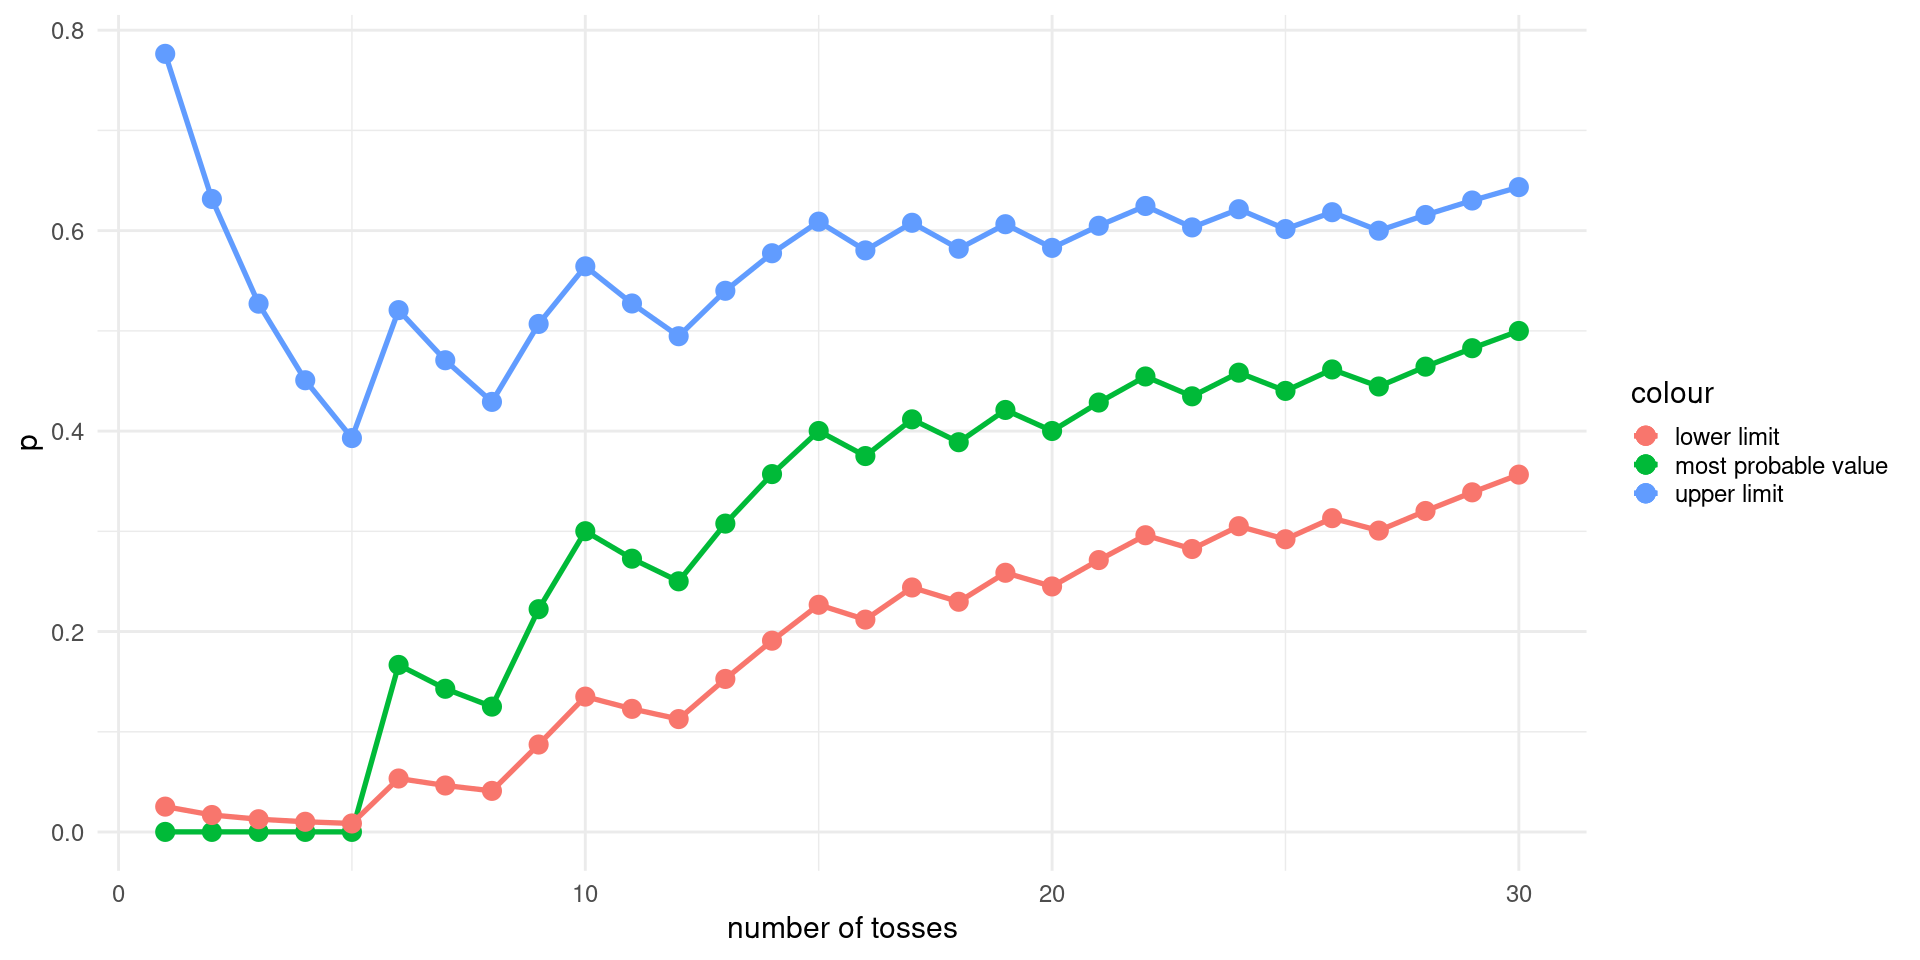

In [36]:
alpha <- 1
beta <- 1
analysis(alpha, beta, data_exp)

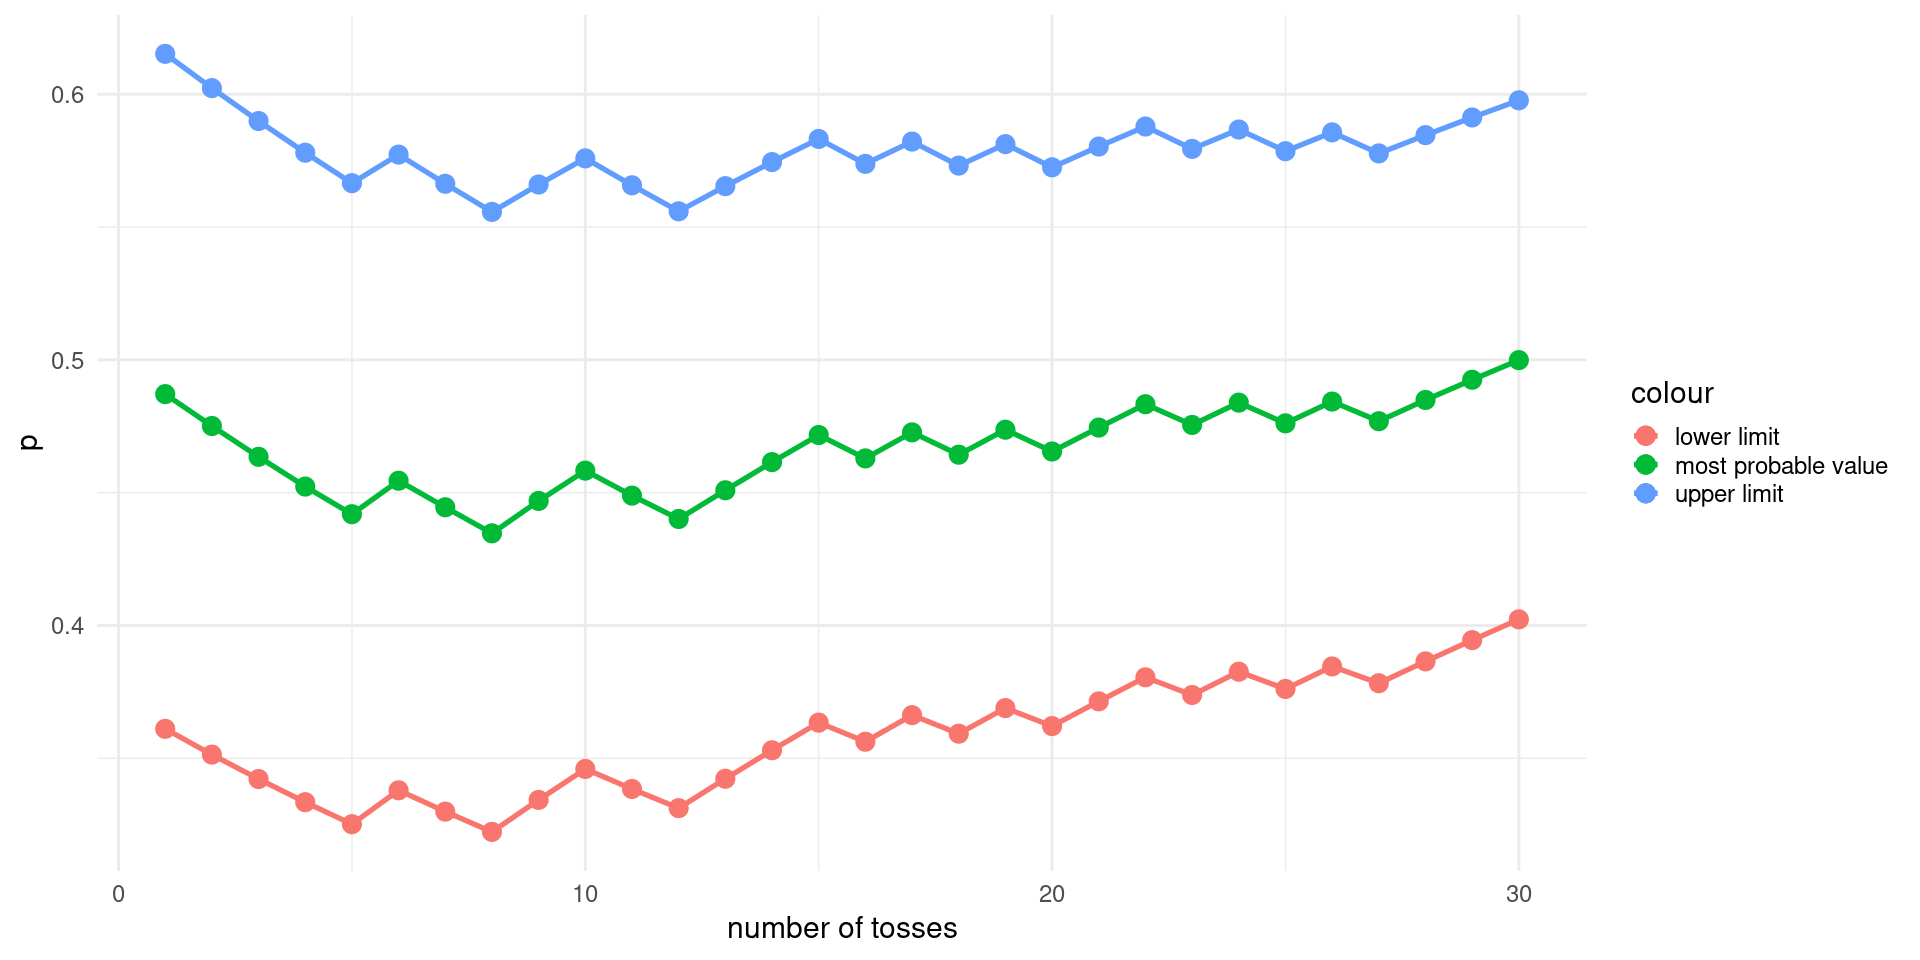

In [37]:
alpha <- 20
beta <- 20
analysis(alpha, beta, data_exp)

### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

The result for both cases is the same as in the previous analysis.

# Exercise 4 -  Six Boxes Toy Model: inference

### The six boxes toy model is described in reference:

### - G. D’Agostini, Probability, propensity and probabilities of propensities (and of probabilities),
### https://arxiv.or/pdf/1612.05292.pdf
### - G. D’Agostini, More lessons form the six box toy experiment,
### https://arxiv.org/pdf/1701.01143.pdf

### Labeling the boxes as follows:

### - H0 - all black

### - H1 - 1 white, 4 black 

### - H2 - 2 white, 3 black 

### - H3 - 3 white, 2 black 

### - H4 - 4 white, 1 black

### - H5 - all white

### Write a program in R that performs a simulation of the process:

Propositions:

$H_j$: box j is selected

$E_w$: a white stone is extracted

$E_b$: a black stone is extracted

We use $E_k$ to refer to extraction of a stone (k is w or b).

$E_k$ and $H_j$ are mutually exclusive, thus:

$P(E_k) = \sum_j P(E_k H_j|I) = \sum_j P(E_k | H_j I) P(H_j|I)$,

$P(H_j) = \sum_j P(H_j E_k|I) = \sum_j P(H_j | E_k I) P(E_k|I)$

The result with the use of the Bayes theorem is:

$ P(H_j|E_k I) \propto P(E_k | H_j I) P(H_j|I) $

Each step we update this probability.

In [38]:
p_E_H <- c(0, 1/5, 2/5, 3/5, 4/5, 1) #counting white balls
prior <- rep(1/6, 6)

p_Ek <- sum(p_E_H*prior)

### 1) selects a random box

In [39]:
box <- sample(0:5, 1)
cat('H', box, ' is the selected box', sep='')

H4 is the selected box

### 2) makes random sampling from the box

In [40]:
num_trials <- 50

balls <- rep(-1, num_trials)
for (i in 1:num_trials) {
    if (runif(1) <= box/5) {
        balls[i] <- 0 #white ball
    } else {
        balls[i] <- 1 #black ball
    }
}

### 3) prints on the standard output the probability of selecting each box

In [41]:
df <- data.frame(trial = c(0),
                 ball_extr = c(NaN),
                 P_H0 = c(prior[1]),
                 P_H1 = c(prior[2]),
                 P_H2 = c(prior[3]),
                 P_H3 = c(prior[4]),
                 P_H4 = c(prior[5]),
                 P_H5 = c(prior[6]),
                 pEk = c(p_Ek))
df

trial,ball_extr,P_H0,P_H1,P_H2,P_H3,P_H4,P_H5,pEk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NaN,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.5


In [42]:
update <- function(prior, ball) {
    p_E_H <- c(0, 1/5, 2/5, 3/5, 4/5, 1)
    
    if (ball == 0) {
        
        p_Ek <- sum(p_E_H*prior)
        
        prior <- prior*p_E_H/p_Ek
        
    } else {
        
        p_Ek <- sum((1-p_E_H)*prior)
        
        prior <- prior*(1-p_E_H)/p_Ek 
        
    }
    
    return(list('prior' = prior,
                 'p_Ek' = p_Ek))
    
}

In [43]:
for (i in 1:num_trials) {
    trial <- update(prior, balls[i])
    prior <- trial$prior
    p_Ek <- trial$p_Ek
    
    df <- rbind(df, c(i, balls[i], prior, p_Ek))
    
}

df

trial,ball_extr,P_H0,P_H1,P_H2,P_H3,P_H4,P_H5,pEk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NaN,0.1666667,1.666667e-01,1.666667e-01,0.166666667,0.1666667,0.1666667,0.5000000
1,0,0.0000000,6.666667e-02,1.333333e-01,0.200000000,0.2666667,0.3333333,0.5000000
2,0,0.0000000,1.818182e-02,7.272727e-02,0.163636364,0.2909091,0.4545455,0.7333333
3,0,0.0000000,4.444444e-03,3.555556e-02,0.120000000,0.2844444,0.5555556,0.8181818
4,1,0.0000000,2.739726e-02,1.643836e-01,0.369863014,0.4383562,0.0000000,0.1297778
5,1,0.0000000,6.153846e-02,2.769231e-01,0.415384615,0.2461538,0.0000000,0.3561644
6,0,0.0000000,2.162162e-02,1.945946e-01,0.437837838,0.3459459,0.0000000,0.5692308
7,0,0.0000000,6.956522e-03,1.252174e-01,0.422608696,0.4452174,0.0000000,0.6216216
8,0,0.0000000,2.104156e-03,7.574961e-02,0.383482378,0.5386639,0.0000000,0.6612174


### 4) plots the probability for each box as a function of the number of trial

In [44]:
p1 <- ggplot() +
      geom_point(data = df, aes(x = trial, y = P_H0), colour = 'deeppink4', size = 5) +
      theme_minimal(base_size=18) +
      labs(x = 'trial', y = 'P(H0)')

p2 <- ggplot() +
      geom_point(data = df, aes(x = trial, y = P_H1), colour = 'deeppink4', size = 5) +
      theme_minimal(base_size=18) +
      labs(x = 'trial', y = 'P(H1)')

p3 <- ggplot() +
      geom_point(data = df, aes(x = trial, y = P_H2), colour = 'deeppink4', size = 5) +
      theme_minimal(base_size=18) +
      labs(x = 'trial', y = 'P(H2)')

p4 <- ggplot() +
      geom_point(data = df, aes(x = trial, y = P_H3), colour = 'deeppink4', size = 5) +
      theme_minimal(base_size=18) +
      labs(x = 'trial', y = 'P(H3)')

p5 <- ggplot() +
      geom_point(data = df, aes(x = trial, y = P_H4), colour = 'deeppink4', size = 5) +
      theme_minimal(base_size=18) +
      labs(x = 'trial', y = 'P(H4)')

p6 <- ggplot() +
      geom_point(data = df, aes(x = trial, y = P_H5), colour = 'deeppink4', size = 5) +
      theme_minimal(base_size=18) +
      labs(x = 'trial', y = 'P(H5)')

True box is: H4

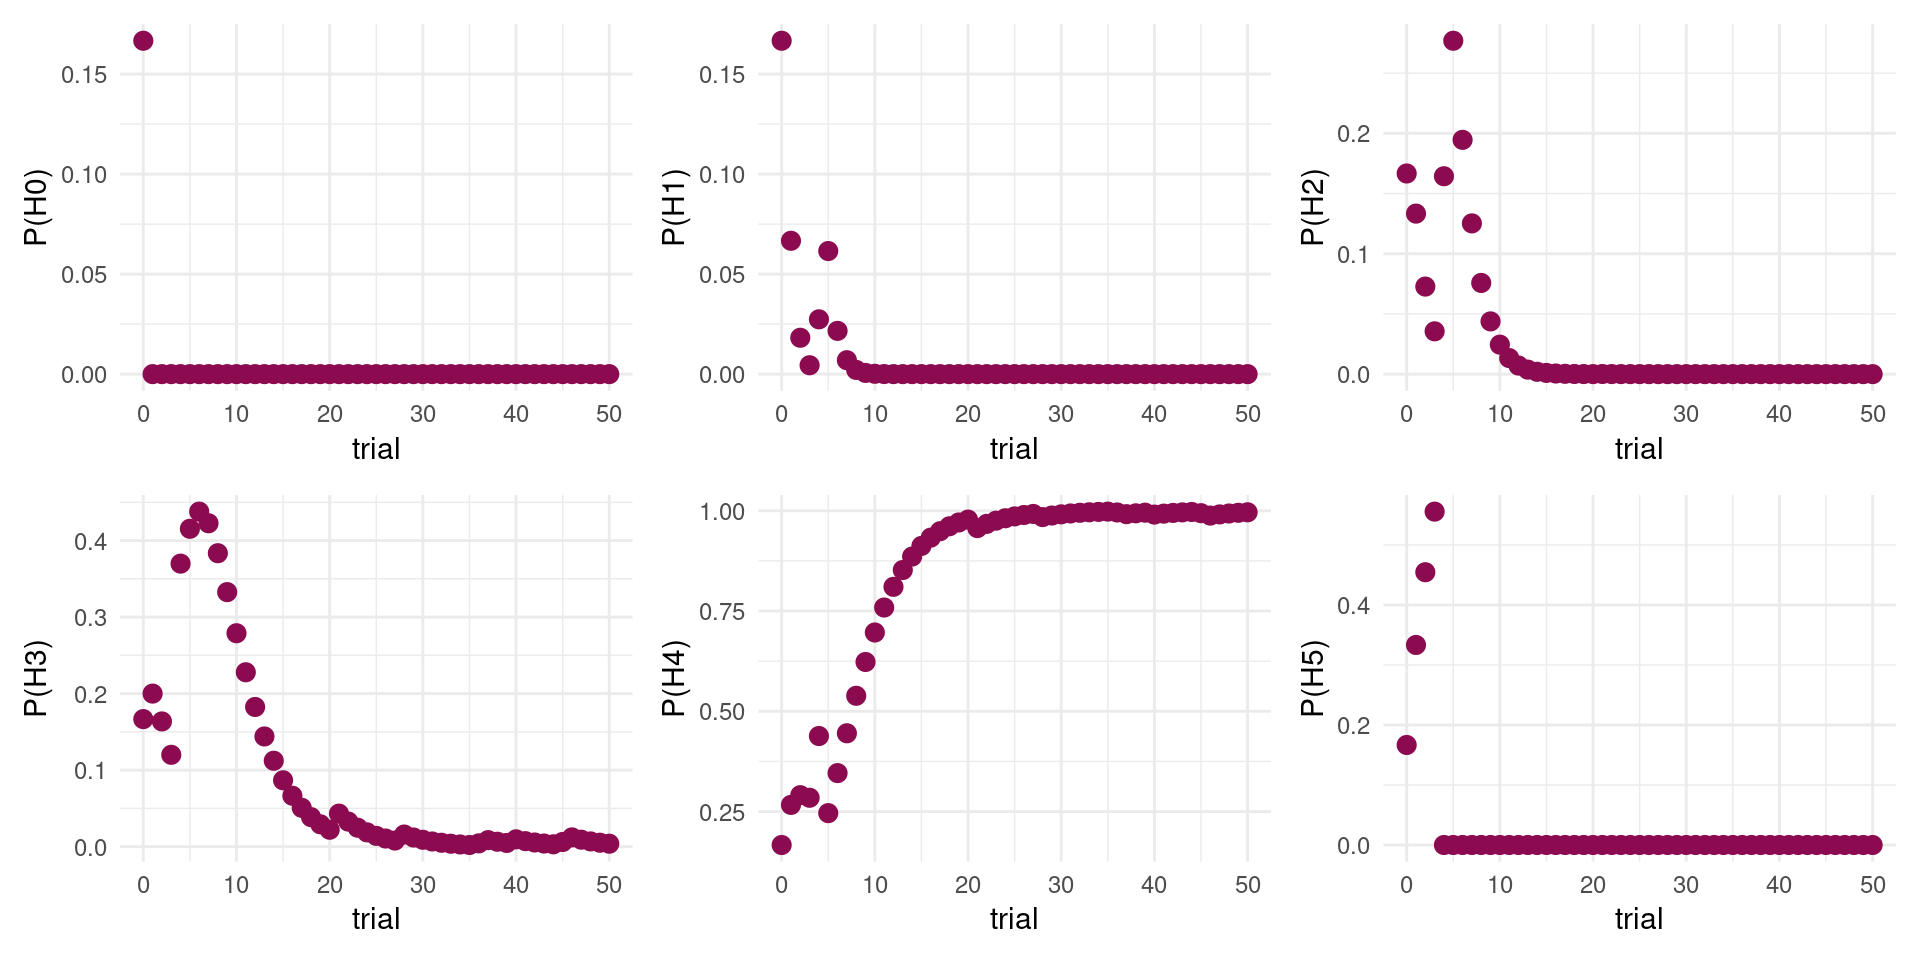

In [45]:
library(patchwork)


cat('True box is: H', box, sep='')
(p1 + p2 + p3) / (p4 + p5 + p6)